In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt #visualizing data
import seaborn as sns
import warnings
import re
import datetime
from matplotlib.dates import DateFormatter
warnings.filterwarnings("ignore")
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-products/flipkart_com-ecommerce_sample.csv


            
                                NOTE: IF ANY BLOCK OF CODE NOT RUN TRY TO RUN MANUALLY USING SHIFT+ENTER
            

In [214]:
df = pd.read_csv('/kaggle/input/flipkart-products/flipkart_com-ecommerce_sample.csv')
df.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree               pid  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1  ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2  ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   

   retail_price  discounted_price  \
0         999.0             379.0   
1       32157.0           22646.0   
2         999.0             499.0   
3         699.0             267.0   
4         220.0             210.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img6a.flixcart.com/image/sofa-bed/j/f...                    False   
2  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
3  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
4  ["http://img5a.flixcart.com/image/pet-shampoo/...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Installati...  
2  {"product_specification"=>[{"key"=>"Ideal For"...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Pet Type",...

In [215]:
#copy the dataset to prevent loss of origanal dataset
cdf=df.copy()

In [216]:
cdf.sample(5)

uniq_id            crawl_timestamp  \
3823   90f86ac4065397340e8012261577c220  2015-12-01 12:40:44 +0000   
14374  7615b88349fbd00f24c0e2ca2649d2ea  2015-12-13 00:29:55 +0000   
17394  7e729cb64d3c8d193a5ee0b7dfe75195  2015-12-20 08:26:17 +0000   
10137  6005ddffeb04cf1cbccb755fef765fa8  2016-03-12 14:25:06 +0000   
18626  d6f1a8bf03b87262263b1abe43aca90f  2016-02-24 16:02:05 +0000   

                                             product_url  \
3823   http://www.flipkart.com/step4deal-wheel-pizza-...   
14374  http://www.flipkart.com/numero-uno-solid-men-s...   
17394  http://www.flipkart.com/pink-rose-metal-bracel...   
10137  http://www.flipkart.com/buynow-glass-54-temper...   
18626  http://www.flipkart.com/priority-hand-held-bag...   

                                          product_name  \
3823                      Step4deal Wheel Pizza Cutter   
14374        Numero Uno Solid Men's Round Neck T-Shirt   
17394                         Pink Rose Metal Bracelet   
10137  Buynow Glass_54 Tempered Glass for Xiaomi Mi 4S   
18626                           Priority Hand-held Bag   

                                   product_category_tree               pid  \
3823   ["Kitchen & Dining >> Kitchen Tools >> Kitchen...  PACEAU9GVDACRKUV   
14374  ["Clothing >> Men's Clothing >> T-Shirts >> Nu...  TSHDUXJFZ2YWCP86   
17394  ["Jewellery >> Bangles, Bracelets & Armlets >>...  BBAE9K48E9UZFP7E   
10137  ["Mobiles & Accessories >> Mobile Accessories ...  ACCEGRYUMK6MDDX2   
18626  ["Bags, Wallets & Belts >> Bags >> Hand Bags >...  HMBEFYMKVJHZGXZ2   

       retail_price  discounted_price  \
3823          499.0             139.0   
14374         849.0             678.0   
17394        1796.0             479.0   
10137         499.0             279.0   
18626        3998.0            1999.0   

                                                   image  \
3823   ["http://img5a.flixcart.com/image/pizza-cutter...   
14374  ["http://img6a.flixcart.com/image/t-shirt/p/8/...   
17394  ["http://img5a.flixcart.com/image/bangle-brace...   
10137  ["http://img6a.flixcart.com/image/screen-guard...   
18626  ["http://img6a.flixcart.com/image/hand-messeng...   

       is_FK_Advantage_product  \
3823                     False   
14374                    False   
17394                    False   
10137                    False   
18626                    False   

                                             description       product_rating  \
3823   Step4deal Wheel Pizza Cutter (Stainless Steel ...  No rating available   
14374  Numero Uno Solid Men's Round Neck T-Shirt - Bu...  No rating available   
17394  Pink Rose Metal Bracelet\n                    ...  No rating available   
10137  Key Features of Buynow Glass_54 Tempered Glass...  No rating available   
18626  Specifications of Priority Hand-held Bag (Mult...  No rating available   

            overall_rating      brand  \
3823   No rating available  Step4deal   
14374  No rating available        NaN   
17394  No rating available  Pink Rose   
10137  No rating available     Buynow   
18626  No rating available   Priority   

                                  product_specifications  
3823   {"product_specification"=>[{"key"=>"Brand", "v...  
14374  {"product_specification"=>[{"key"=>"Sleeve", "...  
17394  {"product_specification"=>[{"key"=>"Brand", "v...  
10137  {"product_specification"=>[{"key"=>"Brand", "v...  
18626  {"product_specification"=>[{"value"=>"Handbag"...

                                                        Data Cleaning Process 

In [217]:
cdf.describe()

retail_price  discounted_price
count   19922.000000      19922.000000
mean     2979.206104       1973.401767
std      9009.639341       7333.586040
min        35.000000         35.000000
25%       666.000000        350.000000
50%      1040.000000        550.000000
75%      1999.000000        999.000000
max    571230.000000     571230.000000

In [218]:
#Checking Number Of Null Row In Each Columns 
cdf.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [219]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [220]:
#For Better Analysis we extract year,month,day From crawl_timestamp And Add Them As New Columns
# As Datatype of crawl_timestamp is object to extract desire output we need to convert into datetime
from datetime import datetime
cdf['crawl_timestamp']=pd.to_datetime(cdf['crawl_timestamp'])
cdf['Year']=cdf['crawl_timestamp'].dt.year
cdf['Month']=cdf['crawl_timestamp'].dt.month
cdf['Days']=cdf['crawl_timestamp'].dt.day

In [221]:
# As we have extract year, month,days from crawl_timestamp we can now delete crawl_timestamp column to reduce dimension
cdf.drop(columns='crawl_timestamp',inplace=True)

In [222]:
# product_url,image both columns are not useful so,its better to drp them from dataset 
cdf.drop(columns=['product_url','image'],inplace=True)

In [223]:
# Let's extract the different category from product_category_tree such as main_category,secondary_category,tertiary_category,quaternary_category
cdf['main_category']=cdf['product_category_tree'].apply(lambda x: x.split('>>')[0][2::])
def secondary_category (value):
    try:
        return value.split(">>")[1]
    except IndexError:
        return "None"
def tertiary_category(value):
    try:
        return value.split('>>')[2]
    except IndexError:
        return "None"
def quaternary_category(value):
    try:
        return value.split('>>')[3][:len(value.split('>>')[3])-2]
    except IndexError:
        return "None"

cdf['secondary_category']=cdf['product_category_tree'].apply(secondary_category)
cdf['tertiary_category']=cdf['product_category_tree'].apply(tertiary_category)    
cdf['quaternary_category']=cdf['product_category_tree'].apply(quaternary_category)

In [224]:
'''As we have done with extraction of main_category,secondary_category,tertiary_catgeory,quaternary_catgeory from product_catgeory_tree 
we can delete product_catgeory_tree from dataset'''
cdf.drop(columns='product_category_tree',inplace=True)

In [225]:
# product_specification and description are not useful fro our analysis so we delete these columns from dataset to reduce dimension
cdf.drop(columns=['product_specifications','description'],inplace=True)

In [226]:
cdf.isnull().sum()

uniq_id                       0
product_name                  0
pid                           0
retail_price                 78
discounted_price             78
is_FK_Advantage_product       0
product_rating                0
overall_rating                0
brand                      5864
Year                          0
Month                         0
Days                          0
main_category                 0
secondary_category            0
tertiary_category             0
quaternary_category           0
dtype: int64

                        Now Let's deal with missing value of dataset

To fill missing value in any column instead of direct filling we use segmented imputation for better result and futher analysis 

In [227]:
#filling missing value in retail_price by median which is rebost to data
# For segment imputation we use product_name to decide the retail_price of missing value
# If in case missing value remains we use direct median for fill then 
cdf['retail_price']=cdf.groupby(['product_name'])['retail_price'].transform(lambda x: x.fillna(x.median()))
cdf['retail_price']=cdf['retail_price'].transform(lambda x: x.fillna(x.median()))

In [228]:
#filling missing value in discounted_price by median which is rebost to data
# For segment imputation we use main_category to decide the discount_price of missing value
# If in case missing value remains we use direct median for fill them
cdf['discounted_price']=cdf.groupby(['product_name'])['discounted_price'].transform(lambda x: x.fillna(x.median()))
cdf['discounted_price']=cdf['discounted_price'].transform(lambda x: x.fillna(x.median()))

In [229]:
# Replacing the No rating available to 0 for rating analysis
cdf['product_rating']=cdf['product_rating'].replace('No rating available',0)
cdf['overall_rating']=cdf['overall_rating'].replace('No rating available',0)

In [230]:
# Filling missing value of brand column using segmented imputation
cdf['brand']=cdf.groupby(['main_category'])['brand'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "unknown"))


In [231]:
cdf.isnull().sum()

uniq_id                    0
product_name               0
pid                        0
retail_price               0
discounted_price           0
is_FK_Advantage_product    0
product_rating             0
overall_rating             0
brand                      0
Year                       0
Month                      0
Days                       0
main_category              0
secondary_category         0
tertiary_category          0
quaternary_category        0
dtype: int64


Now in our dataset there is no missing value so let's do deep dive into analysis


In [232]:
cdf.sample(5)

uniq_id  \
18240  2d1949452966b1c5d512320424c222ec   
11520  8df11e6312f931ea825130604751f9f3   
4914   0131e5d87b72877702d536299cf83b75   
6420   62aca64b99dabb9e277b3ec3d97f506b   
19354  ace154420a51fad090b3543995630051   

                                            product_name               pid  \
18240                                   DANR Women Flats  SNDEHZQQERXYSRFS   
11520                                 Selfie Women Heels  SNDECJAMZFFBC2UG   
4914                  Sumeet Hard Anodised 14 Kadhai 3 L  PTPE3KKXGM4XTGKF   
6420                              Hi Look Alloy Necklace  NKCDTAXFEWQVP9HE   
19354  Aroma Comfort Polyester Dark Blue Plain Eyelet...  CRNEG8DTZRN5EHT6   

       retail_price  discounted_price  is_FK_Advantage_product product_rating  \
18240         999.0             499.0                    False              0   
11520        1200.0             699.0                    False              0   
4914         1760.0            1045.0                    False              0   
6420          795.0             415.0                    False              0   
19354         599.0             499.0                    False              0   

      overall_rating          brand  Year  Month  Days      main_category  \
18240              0           DANR  2016      4    24          Footwear    
11520              0      Katalogue  2015     12    31          Footwear    
4914               0         Sumeet  2015     12     1  Kitchen & Dining    
6420               0        Hi Look  2015     12     1         Jewellery    
19354              0  Aroma Comfort  2016      3     3   Home Furnishing    

             secondary_category tertiary_category  \
18240         Women's Footwear             Flats    
11520         Women's Footwear            Heels"]   
4914                  Cookware       Pots & Pans    
6420        Necklaces & Chains        Necklaces"]   
19354   Curtains & Accessories          Curtains    

                                     quaternary_category  
18240                                   DANR Women Flats  
11520                                               None  
4914                                       Woks & Kadhai  
6420                                                None  
19354   Aroma Comfort Polyester Dark Blue Plain Eyele...

In [233]:
cdf.describe()

retail_price  discounted_price          Year         Month  \
count   20000.000000      20000.000000  20000.000000  20000.000000   
mean     2973.631450       1969.162350   2015.484250      7.435550   
std      8996.711609       7322.079548      0.499764      4.875165   
min        35.000000         35.000000   2015.000000      1.000000   
25%       669.000000        350.000000   2015.000000      2.000000   
50%      1039.500000        550.000000   2015.000000     12.000000   
75%      1999.000000        999.000000   2016.000000     12.000000   
max    571230.000000     571230.000000   2016.000000     12.000000   

               Days  
count  20000.000000  
mean      11.084300  
std       10.423998  
min        1.000000  
25%        1.000000  
50%        7.000000  
75%       20.000000  
max       31.000000

  
                                                       price analysis:

In [234]:
cdf['discount_percentage']=((cdf['retail_price']-cdf['discounted_price'])/cdf['retail_price'])*100

In [235]:
cdf['retail_price'].value_counts()


retail_price
999.0     1287
499.0      697
599.0      641
799.0      583
1299.0     558
          ... 
1013.0       1
1555.0       1
878.0        1
4398.0       1
5795.0       1
Name: count, Length: 2248, dtype: int64

In [236]:
cdf['retail_price'].min()
cdf['retail_price'].max()
# In our dataset retail_price has two many outliers because our value of retail_price vary from 35 to 600000 approx
# For that lets create a new column where we distinguish the product into three category daily_use_products,occasional_product,luxury_products and analyze according to it
def product_category(value):
    if value>=0 and value<5000:
        return "Daily Use Product"
    elif value>=5000 and value<=50000:
        return "Occasional Product"
    else:
        return "Luxury Product"
cdf['product_category']=cdf['retail_price'].apply(lambda x: product_category(x))

In [237]:
cdf.head()

uniq_id                           product_name  \
0  c2d766ca982eca8304150849735ffef9    Alisha Solid Women's Cycling Shorts   
1  7f7036a6d550aaa89d34c77bd39a5e48    FabHomeDecor Fabric Double Sofa Bed   
2  f449ec65dcbc041b6ae5e6a32717d01b                             AW Bellies   
3  0973b37acd0c664e3de26e97e5571454    Alisha Solid Women's Cycling Shorts   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  Sicons All Purpose Arnica Dog Shampoo   

                pid  retail_price  discounted_price  is_FK_Advantage_product  \
0  SRTEH2FF9KEDEFGF         999.0             379.0                    False   
1  SBEEH3QGU7MFYJFY       32157.0           22646.0                    False   
2  SHOEH4GRSUBJGZXE         999.0             499.0                    False   
3  SRTEH2F6HUZMQ6SJ         699.0             267.0                    False   
4  PSOEH3ZYDMSYARJ5         220.0             210.0                    False   

  product_rating overall_rating         brand  Year  Month  Days  \
0              0              0        Alisha  2016      3    25   
1              0              0  FabHomeDecor  2016      3    25   
2              0              0            AW  2016      3    25   
3              0              0        Alisha  2016      3    25   
4              0              0        Sicons  2016      3    25   

   main_category       secondary_category             tertiary_category  \
0      Clothing         Women's Clothing    Lingerie, Sleep & Swimwear    
1     Furniture    Living Room Furniture            Sofa Beds & Futons    
2      Footwear         Women's Footwear                    Ballerinas    
3      Clothing         Women's Clothing    Lingerie, Sleep & Swimwear    
4  Pet Supplies                 Grooming              Skin & Coat Care    

                                 quaternary_category  discount_percentage  \
0                                              Short            62.062062   
1   FabHomeDecor Fabric Double Sofa Bed (Finish C...            29.576764   
2                                         AW Bellies            50.050050   
3                                              Short            61.802575   
4                                             Shampo             4.545455   

     product_category  
0   Daily Use Product  
1  Occasional Product  
2   Daily Use Product  
3   Daily Use Product  
4   Daily Use Product

In [238]:
#extract all three type of product from dataset and futher analyze them
daily_use_product=cdf[cdf['product_category']=='Daily Use Product']
pd.DataFrame(daily_use_product)
daily_use_product.head()

uniq_id  \
0  c2d766ca982eca8304150849735ffef9   
2  f449ec65dcbc041b6ae5e6a32717d01b   
3  0973b37acd0c664e3de26e97e5571454   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7   
5  c2a17313954882c1dba461863e98adf2   

                                        product_name               pid  \
0                Alisha Solid Women's Cycling Shorts  SRTEH2FF9KEDEFGF   
2                                         AW Bellies  SHOEH4GRSUBJGZXE   
3                Alisha Solid Women's Cycling Shorts  SRTEH2F6HUZMQ6SJ   
4              Sicons All Purpose Arnica Dog Shampoo  PSOEH3ZYDMSYARJ5   
5  Eternal Gandhi Super Series Crystal Paper Weig...  PWTEB7H2E4KCYUE3   

   retail_price  discounted_price  is_FK_Advantage_product product_rating  \
0         999.0             379.0                    False              0   
2         999.0             499.0                    False              0   
3         699.0             267.0                    False              0   
4         220.0             210.0                    False              0   
5         430.0             430.0                    False              0   

  overall_rating           brand  Year  Month  Days  \
0              0          Alisha  2016      3    25   
2              0              AW  2016      3    25   
3              0          Alisha  2016      3    25   
4              0          Sicons  2016      3    25   
5              0  Eternal Gandhi  2016      3    25   

                                       main_category  secondary_category  \
0                                          Clothing    Women's Clothing    
2                                          Footwear    Women's Footwear    
3                                          Clothing    Women's Clothing    
4                                      Pet Supplies            Grooming    
5  Eternal Gandhi Super Series Crystal Paper Weig...                None   

              tertiary_category quaternary_category  discount_percentage  \
0   Lingerie, Sleep & Swimwear                Short            62.062062   
2                   Ballerinas           AW Bellies            50.050050   
3   Lingerie, Sleep & Swimwear                Short            61.802575   
4             Skin & Coat Care               Shampo             4.545455   
5                          None                None             0.000000   

    product_category  
0  Daily Use Product  
2  Daily Use Product  
3  Daily Use Product  
4  Daily Use Product  
5  Daily Use Product

In [239]:
occasional_product=cdf[cdf['product_category']=='Occasional Product']
pd.DataFrame(occasional_product)
occasional_product.head()

uniq_id  \
1   7f7036a6d550aaa89d34c77bd39a5e48   
7   8542703ca9e6ebdf6d742638dfb1f2ca   
16  849ab05698081a374215d0b7d18047d0   
19  7ee3e337474a29b38cfe1f5d4020d633   
42  f5b22eaa5f79e67209612997f4aa215d   

                                         product_name               pid  \
1                 FabHomeDecor Fabric Double Sofa Bed  SBEEH3QGU7MFYJFY   
7                 FabHomeDecor Fabric Double Sofa Bed  SBEEH3QGYGHFUEXN   
16                FabHomeDecor Fabric Double Sofa Bed  SBEEH3QGAYAEPRCG   
19                FabHomeDecor Fabric Double Sofa Bed  SBEEH3QGWRGG3J6Q   
42  Himmlisch ST381 Magnetic Sun Shade For Maruti ...  SUDEJFBRVYEUZUDH   

    retail_price  discounted_price  is_FK_Advantage_product product_rating  \
1        32157.0           22646.0                    False              0   
7        32157.0           22646.0                    False              0   
16       32157.0           22646.0                    False              0   
19       32157.0           22646.0                    False              0   
42        6999.0            1899.0                    False              0   

   overall_rating         brand  Year  Month  Days main_category  \
1               0  FabHomeDecor  2016      3    25    Furniture    
7               0  FabHomeDecor  2016      3    25    Furniture    
16              0  FabHomeDecor  2016      3    25    Furniture    
19              0  FabHomeDecor  2016      3    25    Furniture    
42              0     Himmlisch  2016      5    26   Automotive    

             secondary_category          tertiary_category  \
1        Living Room Furniture         Sofa Beds & Futons    
7        Living Room Furniture         Sofa Beds & Futons    
16       Living Room Furniture         Sofa Beds & Futons    
19       Living Room Furniture         Sofa Beds & Futons    
42   Accessories & Spare parts    Car Interior & Exterior    

                                  quaternary_category  discount_percentage  \
1    FabHomeDecor Fabric Double Sofa Bed (Finish C...            29.576764   
7    FabHomeDecor Fabric Double Sofa Bed (Finish C...            29.576764   
16   FabHomeDecor Fabric Double Sofa Bed (Finish C...            29.576764   
19   FabHomeDecor Fabric Double Sofa Bed (Finish C...            29.576764   
42                                        Car Interio            72.867553   

      product_category  
1   Occasional Product  
7   Occasional Product  
16  Occasional Product  
19  Occasional Product  
42  Occasional Product

In [240]:
luxury_product=cdf[cdf['product_category']=='Luxury Product']
pd.DataFrame(luxury_product)
luxury_product.head()

uniq_id  \
108   710ed5f2393a4b9e8823aa0029f71f93   
116   329c5f4d7aced63e1ce3e88f41d5e7e6   
134   08452abdadb3db1e686b94a9c52fc7b6   
7915  c4b045288524a8770c760ed2bbca2ed5   
9782  022a7f08d051e2cfca917ef0a6d3a19a   

                                           product_name               pid  \
108   TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...  WATEA6UGFGKZKDJC   
116   Breitling AB011010/BB08 131S Chronomat 44 Anal...  WATE9DX9E4YSRJSY   
134      Cartier W6701005 Analog Watch  - For Boys, Men  WATEAK8SE2RUK7GM   
7915  Audeze Lcd2 In Bamboo, High Quality Planar Mag...  ACCEEV5UV5NV4PKZ   
9782   The Curve Full Sleeve Solid Men's Quilted Jacket  JCKEAEA7REDBGJVY   

      retail_price  discounted_price  is_FK_Advantage_product product_rating  \
108       107750.0          107750.0                    False              0   
116       571230.0          571230.0                    False              0   
134       201000.0          201000.0                    False              0   
7915      116292.0          116292.0                    False              0   
9782       69999.0           48999.0                    False              0   

     overall_rating            brand  Year  Month  Days  \
108               0  Italian Fashion  2015     12     4   
116               0  Italian Fashion  2015     12     4   
134               0  Italian Fashion  2015     12     4   
7915              0           Audeze  2016      3    11   
9782              0          Regular  2016      1     7   

               main_category    secondary_category  \
108                 Watches         Wrist Watches    
116                 Watches         Wrist Watches    
134                 Watches         Wrist Watches    
7915  Mobiles & Accessories    Mobile Accessories    
9782               Clothing        Men's Clothing    

               tertiary_category quaternary_category  discount_percentage  \
108    TAG Heuer Wrist Watches"]                None             0.000000   
116    Breitling Wrist Watches"]                None             0.000000   
134      Cartier Wrist Watches"]                None             0.000000   
7915                 Headphones     Audeze Headphone             0.000000   
9782     Winter & Seasonal Wear               Jacket            30.000429   

     product_category  
108    Luxury Product  
116    Luxury Product  
134    Luxury Product  
7915   Luxury Product  
9782   Luxury Product

<Axes: xlabel='retail_price', ylabel='Number Of Product With This Price Segment'>

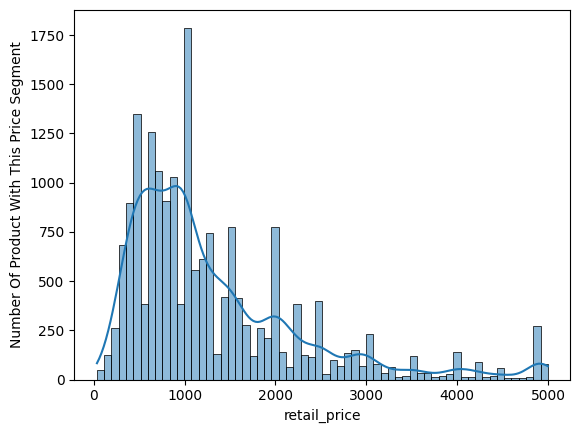

In [241]:

plt.ylabel('Number Of Product With This Price Segment')
sns.histplot(daily_use_product.retail_price,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff187a454e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff187a45ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff187a451e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff187a460e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff187a463e0>],
 'means': []}

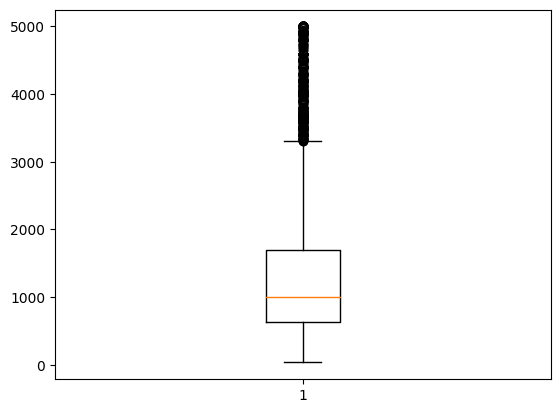

In [242]:
plt.boxplot(daily_use_product.retail_price)

The Daily Use Product category is right skewed (positive skewed)  

<Axes: xlabel='retail_price', ylabel='Count'>

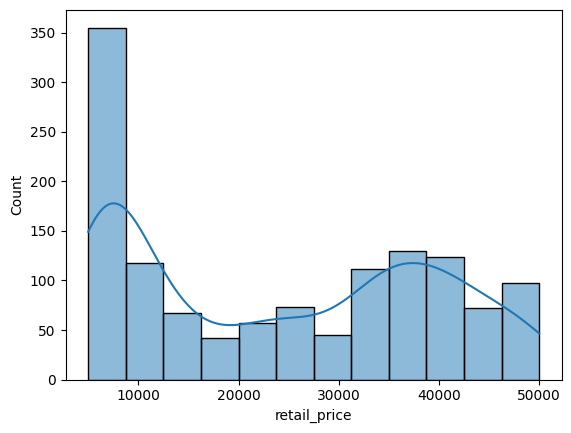

In [243]:
sns.histplot(occasional_product.retail_price,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff187ad6650>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff187ad6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff187ad6350>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff187ad71c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff187ad74c0>],
 'means': []}

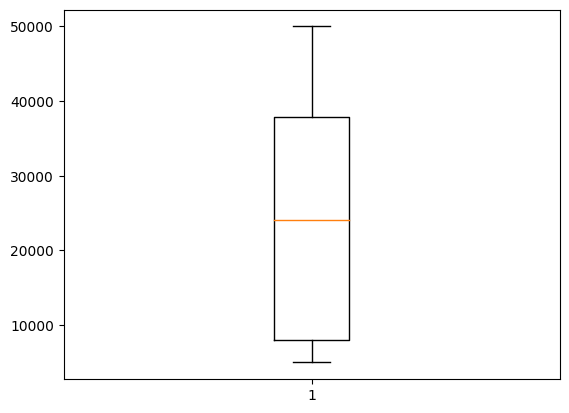

In [244]:
plt.boxplot(occasional_product.retail_price)

The occasional product category is not proper normal distribution but yeah it is normal distributed 

<Axes: xlabel='retail_price', ylabel='Count'>

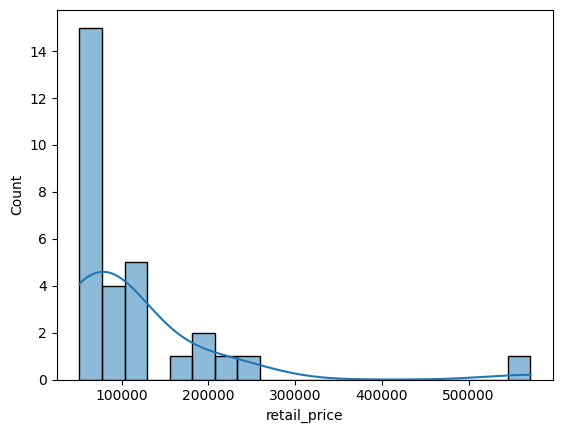

In [245]:
sns.histplot(luxury_product.retail_price,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff18737c700>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff18737cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff18737c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff18737d5a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff18737d8a0>],
 'means': []}

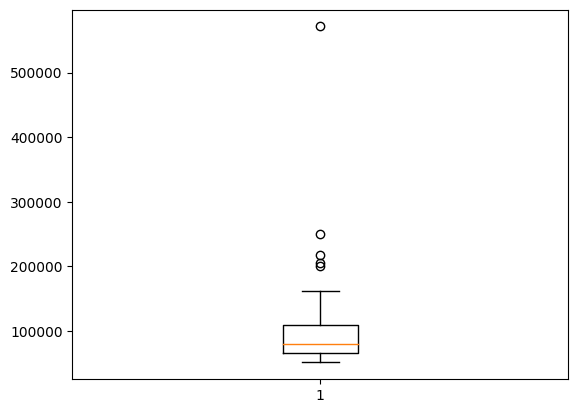

In [246]:
plt.boxplot(luxury_product.retail_price)

The luxury product category is postive skewed


                                                              Daily Use Product
                                                                  Analysis:
                                                            

PRICE ANALYSIS:

In [247]:
daily_use_product.describe()

retail_price  discounted_price          Year         Month  \
count  18678.000000      18678.000000  18678.000000  18678.000000   
mean    1331.189046        724.164846   2015.464182      7.669129   
std      996.265200        596.074020      0.498729      4.816287   
min       35.000000         35.000000   2015.000000      1.000000   
25%      630.000000        349.000000   2015.000000      3.000000   
50%      999.000000        499.000000   2015.000000     12.000000   
75%     1699.000000        899.000000   2016.000000     12.000000   
max     4999.000000       4999.000000   2016.000000     12.000000   

               Days  discount_percentage  
count  18678.000000         18678.000000  
mean      11.370115            41.431596  
std       10.454388            23.548481  
min        1.000000             0.000000  
25%        1.000000            23.094688  
50%        7.000000            47.534430  
75%       20.000000            60.040027  
max       31.000000            95.273818

In [248]:
#How average and median price vary for different products category
average_retail_price_for_daily_use_products=daily_use_product.groupby(['main_category'])['retail_price'].apply(lambda x: x.mean())
median_retail_price_for_daily_use_products=daily_use_product.groupby(['main_category'])['retail_price'].apply(lambda x: x.median())

average_retail_price_for_daily_use_products

main_category
ABEEZ Boys, Men, Girls (Black, Pack of 1)"]               399.0
ANAND ARCHIES Girls Flats"]                               499.0
ANAND ARCHIES Girls Wedges"]                              899.0
ANASAZI Casual 3/4 Sleeve Solid Women's Top"]             899.0
ATV Pouch for Acer Liquid Z330 (STEEL BLUE)"]             549.0
                                                          ...  
run of luck Solid Women's Round Neck Dark Blue T..."]     299.0
soie Fashion Women's Full Coverage Bra"]                  540.0
soie Fashion Women's Sports Bra"]                         880.0
tadd Men's, Women's Ankle Length Socks"]                  499.0
xy decor Cotton Sofa Cover (white Pack of 6)"]           1699.0
Name: retail_price, Length: 246, dtype: float64

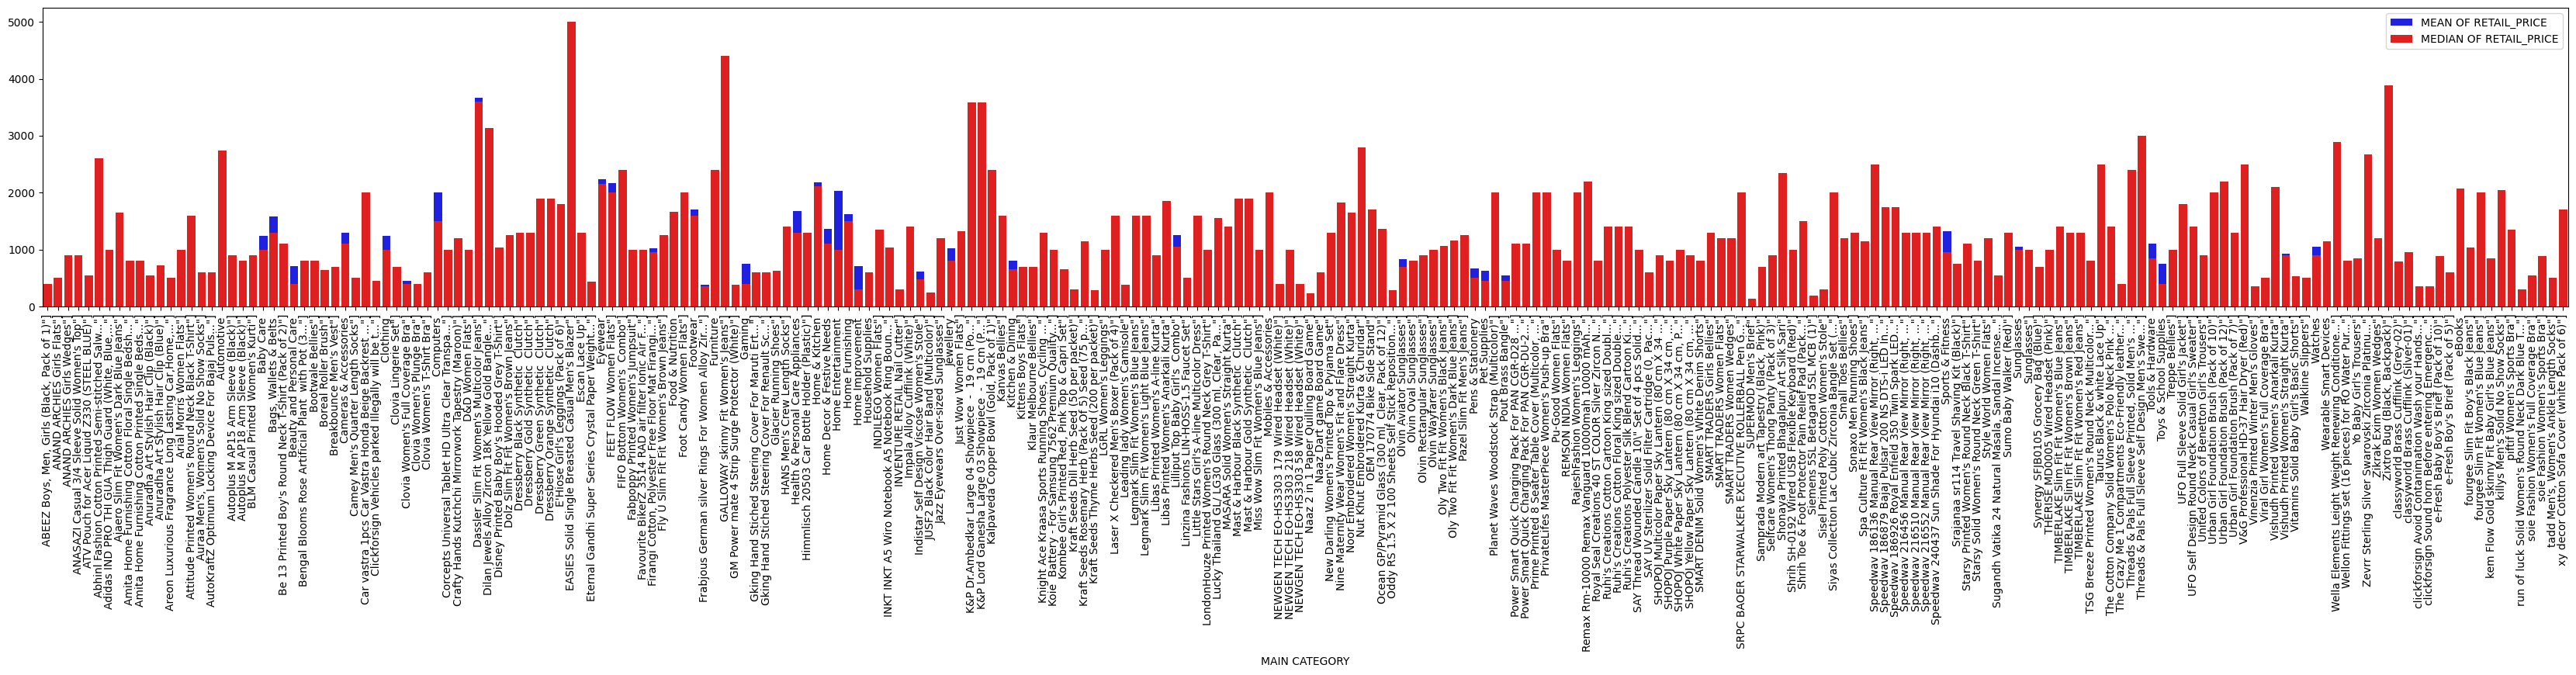

In [249]:
plt.figure(figsize=(42,5))
plt.xticks(rotation=90)

sns.barplot(y=average_retail_price_for_daily_use_products.values,x=average_retail_price_for_daily_use_products.index,color='blue',label='MEAN OF RETAIL_PRICE')
sns.barplot(y=median_retail_price_for_daily_use_products.values,x=median_retail_price_for_daily_use_products.index,color='red',label="MEDIAN OF RETAIL_PRICE")
plt.xlabel("MAIN CATEGORY")
plt.legend(loc="upper right")

In [250]:
# how discount vary by different main category in daily use product category
average_discounted_price_for_daily_use_products=daily_use_product.groupby(['main_category'])['discounted_price'].apply(lambda x: x.mean())
median_discounted_price_for_daily_use_products=daily_use_product.groupby(['main_category'])['discounted_price'].apply(lambda x: x.median())


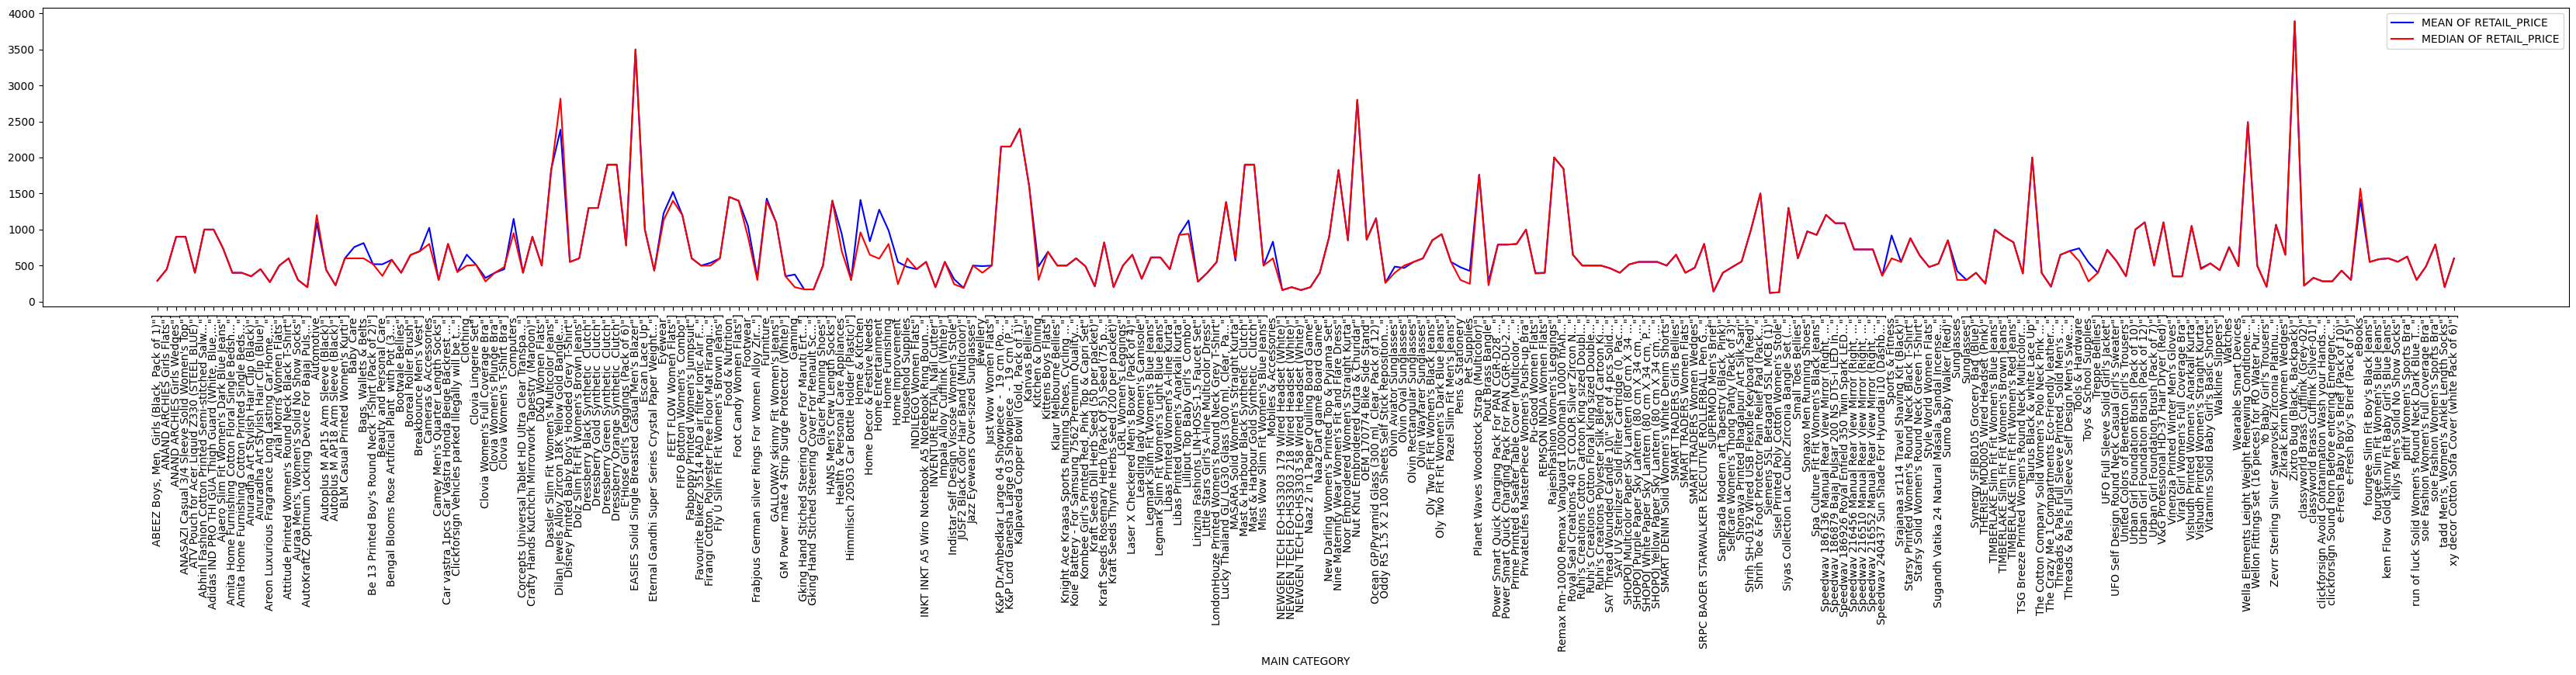

In [251]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(42,5))
plt.xticks(rotation=90)
sns.lineplot(y=average_discounted_price_for_daily_use_products.values,x=average_discounted_price_for_daily_use_products.index,color='blue',label='MEAN OF RETAIL_PRICE')
sns.lineplot(y=median_discounted_price_for_daily_use_products.values,x=median_discounted_price_for_daily_use_products.index,color='red',label="MEDIAN OF RETAIL_PRICE")
plt.xlabel("MAIN CATEGORY")
plt.legend(loc="upper right")

Text(0, 0.5, ' COUNT OF DISCOUNT PERCENATGE % ')

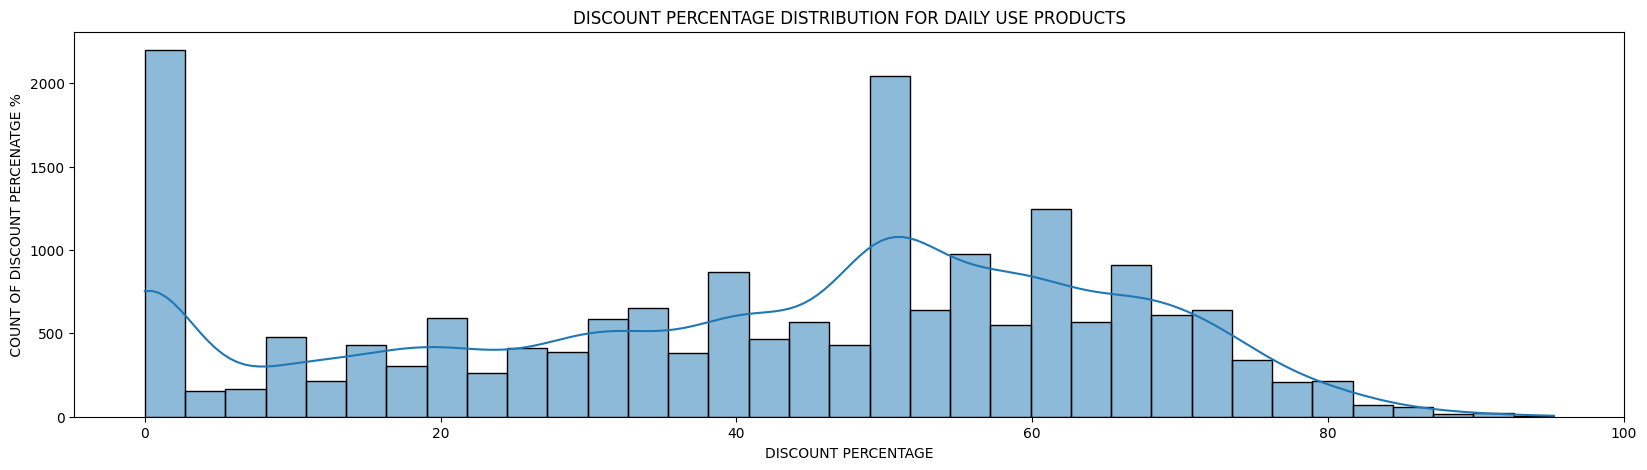

In [252]:
# how discount percenatge vary for diferent product in daily use product
plt.figure(figsize=(20,5))
sns.histplot(daily_use_product['discount_percentage'],kde=True)
plt.title('DISCOUNT PERCENTAGE DISTRIBUTION FOR DAILY USE PRODUCTS')
plt.xlabel("DISCOUNT PERCENTAGE")
plt.ylabel(" COUNT OF DISCOUNT PERCENATGE % ")

In [253]:
# top 30 products with average heighest discount in daily use products 
discount=daily_use_product.groupby(['main_category'])['discount_percentage'].mean()
top_30_discounted_daily_use_product=discount.nlargest(30)
top_30_discounted_daily_use_product

main_category
NEWGEN TECH EO-HS3303 218 Wired Headset (White)"]        80.080080
Himmlisch 20503 Car Bottle Holder (Plastic)"]            76.982294
Threads & Pals Full Sleeve Self Design Men's Swe..."]    76.584390
Shonaya Printed Bhagalpuri Art Silk Sari"]               76.282051
Yo Baby Girl's Trousers"]                                76.000000
THERISE MD0005 Wired Headset (Pink)"]                    75.075075
GALLOWAY skinny Fit Women's Jeans"]                      75.017049
Little Stars Girl's A-line Multicolor Dress"]            74.984326
Speedwav 240437 Sun Shade For Hyundai i10 (Dashb..."]    74.428571
killys Men's Solid No Show Socks"]                       73.094027
Threads & Pals Full Sleeve Printed, Solid Men's ..."]    72.977481
classyworld Brass Cufflink (Grey-02)"]                   72.116603
Gking Hand Stiched Steering Cover For Maruti Ert..."]    71.953255
Gking Hand Stiched Steering Cover For Renault Sc..."]    71.953255
Autoplus M AP18 Arm Sleeve (Black)"]            

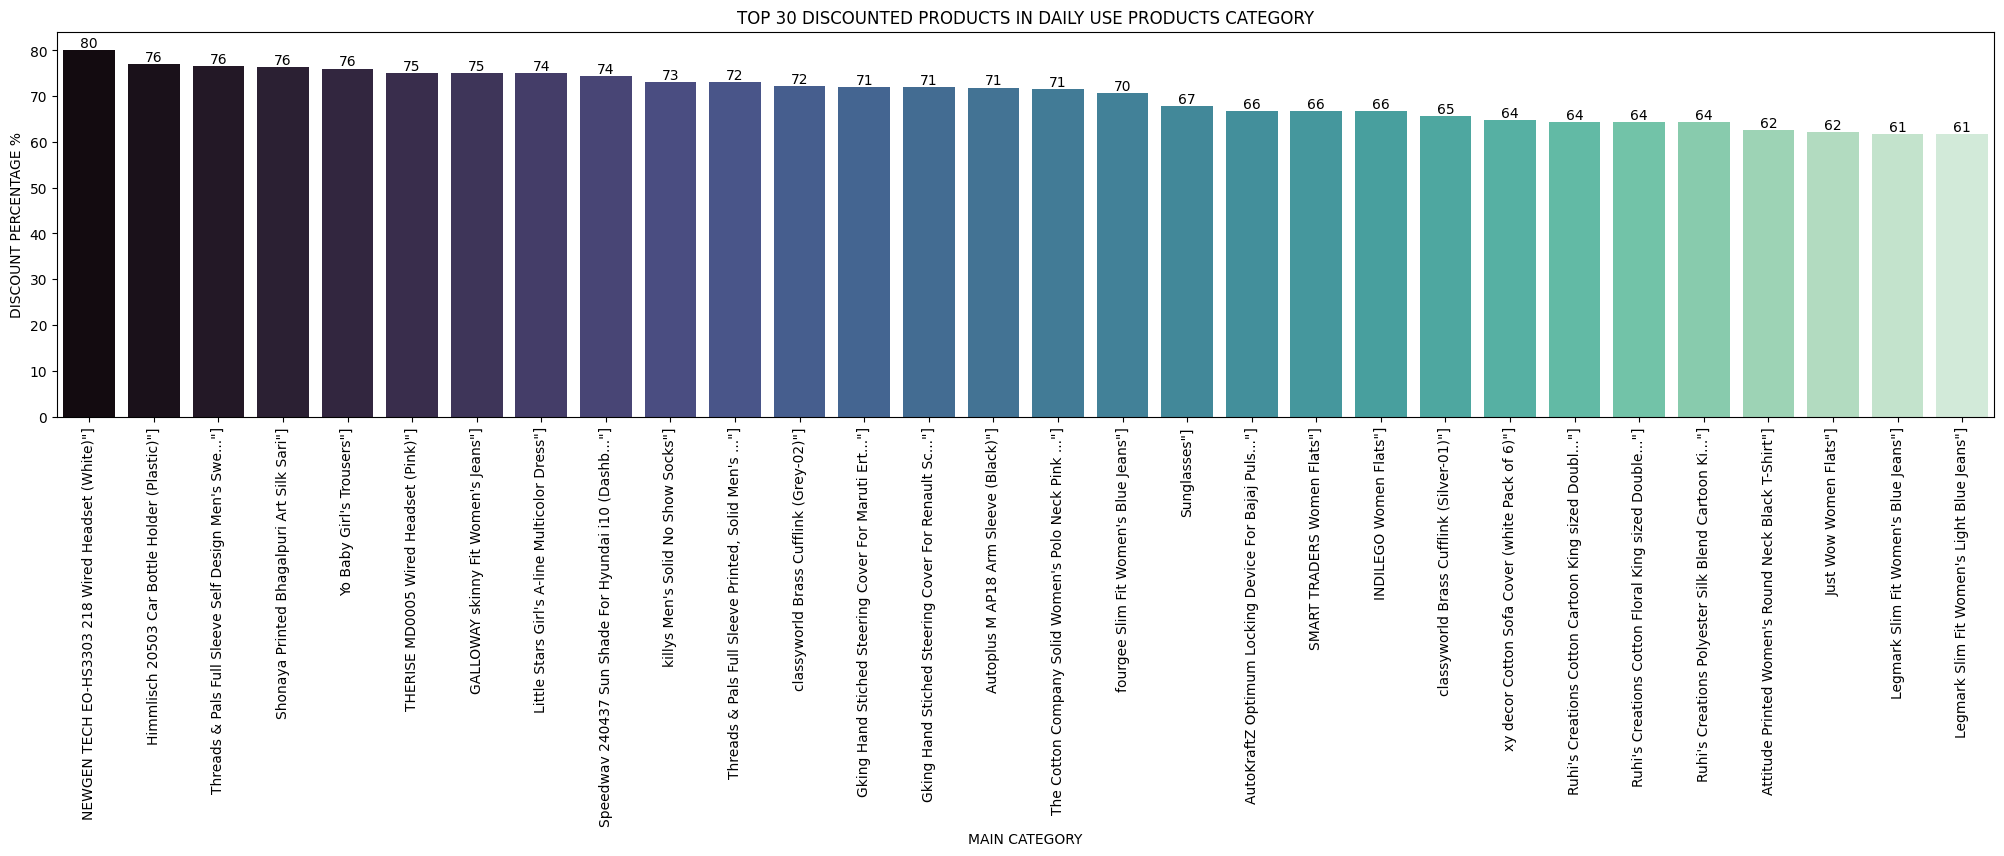

In [254]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=top_30_discounted_daily_use_product.index,y=top_30_discounted_daily_use_product.values,palette='mako')
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title('TOP 30 DISCOUNTED PRODUCTS IN DAILY USE PRODUCTS CATEGORY')
#ADDING DATA LABEL TO BAR 
for conatiner in ax.containers:
    ax.bar_label(conatiner,fmt='%d')

In [255]:
#Are there any significant price differences between FK Advantage products and others?
fk_advantage_product_in_daily_use_products=daily_use_product.groupby(["is_FK_Advantage_product"])['retail_price'].describe()
fk_advantage_product_in_daily_use_products

count        mean          std   min    25%    50%  \
is_FK_Advantage_product                                                         
False                    17932.0  1334.98037  1004.110959  35.0  619.0  999.0   
True                       746.0  1240.05496   779.405160  79.0  750.0  999.0   

                            75%     max  
is_FK_Advantage_product                  
False                    1699.0  4999.0  
True                     1599.0  4995.0

In [256]:
#Are there any significant price differences between FK Advantage products and others?
discounted_fk_advantage_product_in_daily_use_products=daily_use_product.groupby(["is_FK_Advantage_product"])['discounted_price'].describe()
discounted_fk_advantage_product_in_daily_use_products

count        mean         std   min    25%    50%  \
is_FK_Advantage_product                                                        
False                    17932.0  719.336215  594.522441  35.0  349.0  499.0   
True                       746.0  840.233244  621.443299  79.0  419.0  714.0   

                           75%     max  
is_FK_Advantage_product                 
False                    899.0  4999.0  
True                     999.0  4995.0

From analysis we can conclude that those products which are fk_advantage_products they have heigher discounted price,so from customer pov we should do shopping whenever there is fk_advantege avilabel.


RATING ANALYSIS:

In [257]:
#correlection between retail_price,discounted_price,discount_percetage
corr_daily_use_products=daily_use_product[['retail_price','discounted_price','discount_percentage']].corr()
corr_daily_use_products

retail_price  discounted_price  discount_percentage
retail_price             1.000000          0.779443             0.236543
discounted_price         0.779443          1.000000            -0.289154
discount_percentage      0.236543         -0.289154             1.000000

<Axes: >

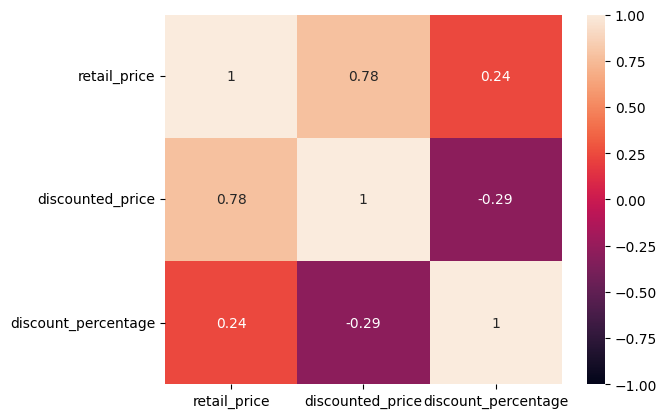

In [258]:
sns.heatmap(corr_daily_use_products,vmin=-1,vmax=1,annot=True)

CONCLUSION:
From above heat map we find that retail_price and discounted_price is positively related and their bonding is decent and retail_price and discount_percenatge are not so related their realation is too week but discounted_price and discount_percenatge is negitively related to each other but not with tight realation.

RATING ANALYSIS:


<Axes: >

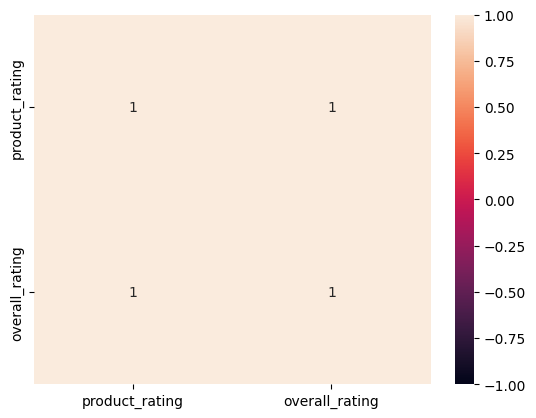

In [259]:
rating_corr=daily_use_product[['product_rating','overall_rating']].corr()
sns.heatmap(rating_corr,vmin=-1,vmax=1,annot=True)

Equal relation between product_rating and overall_rating which show that  customers which give product_rating also give overall_rating and vice-versa

Text(0.5, 1.0, 'PRODUCT RATING OF DAILY USE PRODUCTS')

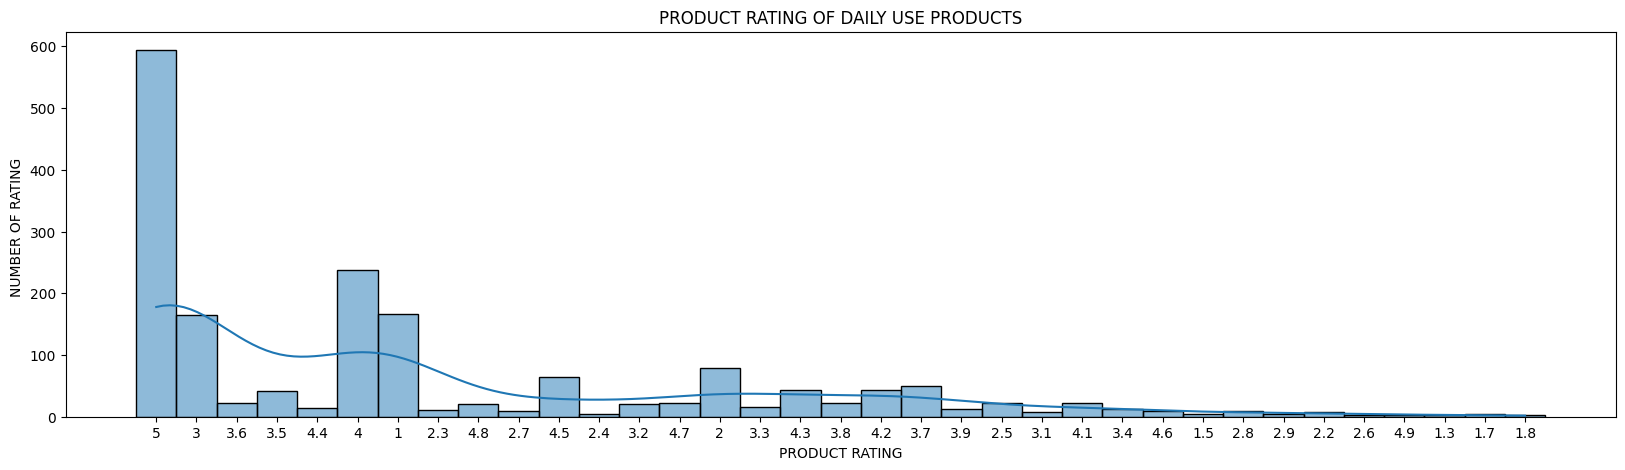

In [260]:
#how rating vary for diferent products of daily use product category after removing zero rating for better results
errorfree_rating_daily_use_product=daily_use_product[~((daily_use_product['product_rating']==0) & (daily_use_product['overall_rating']==0))]
errorfree_rating_daily_use_product
plt.figure(figsize=(20,5))
sns.histplot(errorfree_rating_daily_use_product.product_rating,kde=True)
plt.xlabel("PRODUCT RATING")
plt.ylabel("NUMBER OF RATING ")
plt.title("PRODUCT RATING OF DAILY USE PRODUCTS")

Text(0.5, 1.0, 'OVERALL RATING OF DAILY USE PRODUCTS')

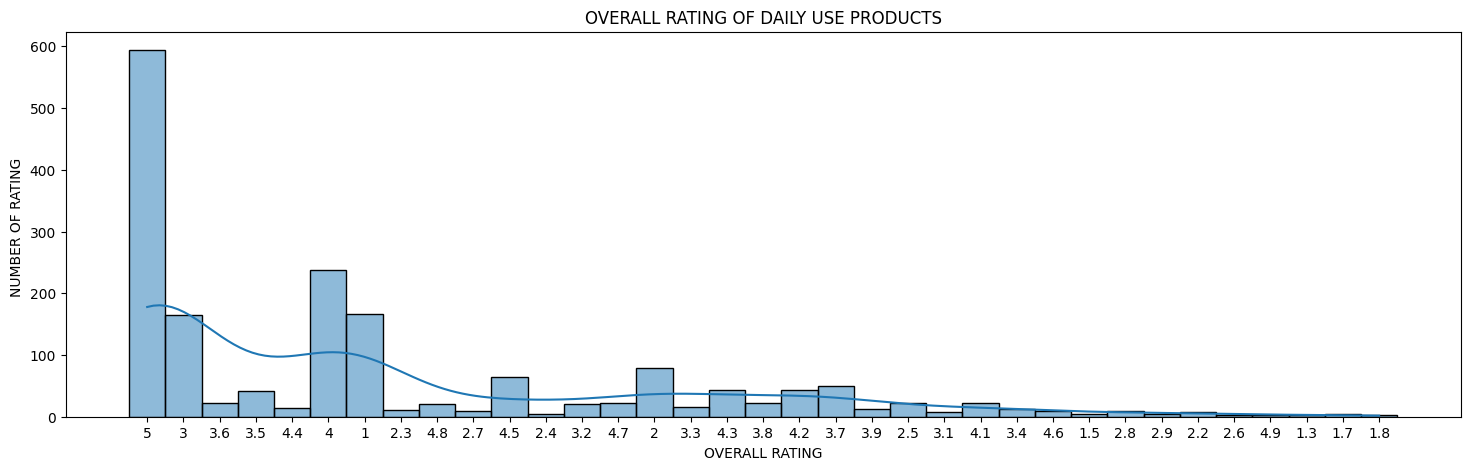

In [261]:
plt.figure(figsize=(18,5))
sns.histplot(errorfree_rating_daily_use_product.overall_rating,kde=True)
plt.xlabel("OVERALL RATING")
plt.ylabel("NUMBER OF RATING ")
plt.title("OVERALL RATING OF DAILY USE PRODUCTS")

In [262]:
#how retail_price,product_rating,overall_rating related to each other 
rating_corr_daily_use_products=errorfree_rating_daily_use_product[['retail_price','product_rating','overall_rating']].corr()
rating_corr_daily_use_products

retail_price  product_rating  overall_rating
retail_price        1.000000        0.047371        0.047371
product_rating      0.047371        1.000000        1.000000
overall_rating      0.047371        1.000000        1.000000

<Axes: >

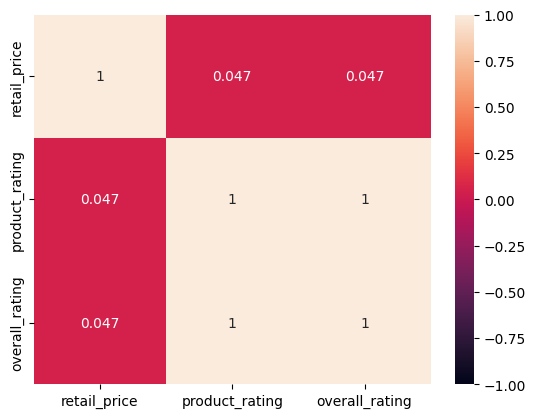

In [263]:
sns.heatmap(rating_corr_daily_use_products,vmin=-1,vmax=1,annot=True)

CONCLUSION:
All those product which have product_rating have also overall_rating but there is too weak relation between retail_price and product_rating

In [264]:
#How have product prices changed over time?
daily_use_product_price_over_year=daily_use_product.groupby(['Year','main_category'])['retail_price'].median()
daily_use_product_price_over_year

Year  main_category                                        
2015  Automotive                                               4200.0
      Baby Care                                                1220.0
      Bags, Wallets & Belts                                     849.5
      Beauty and Personal Care                                  390.0
      Cameras & Accessories                                    1100.0
                                                                ...  
2016  run of luck Solid Women's Round Neck Dark Blue T..."]     299.0
      soie Fashion Women's Full Coverage Bra"]                  540.0
      soie Fashion Women's Sports Bra"]                         880.0
      tadd Men's, Women's Ankle Length Socks"]                  499.0
      xy decor Cotton Sofa Cover (white Pack of 6)"]           1699.0
Name: retail_price, Length: 270, dtype: float64

<Axes: title={'center': 'How Have Product Prices Changed Over Time?'}, xlabel='main_category', ylabel='RETAIL PRICE'>

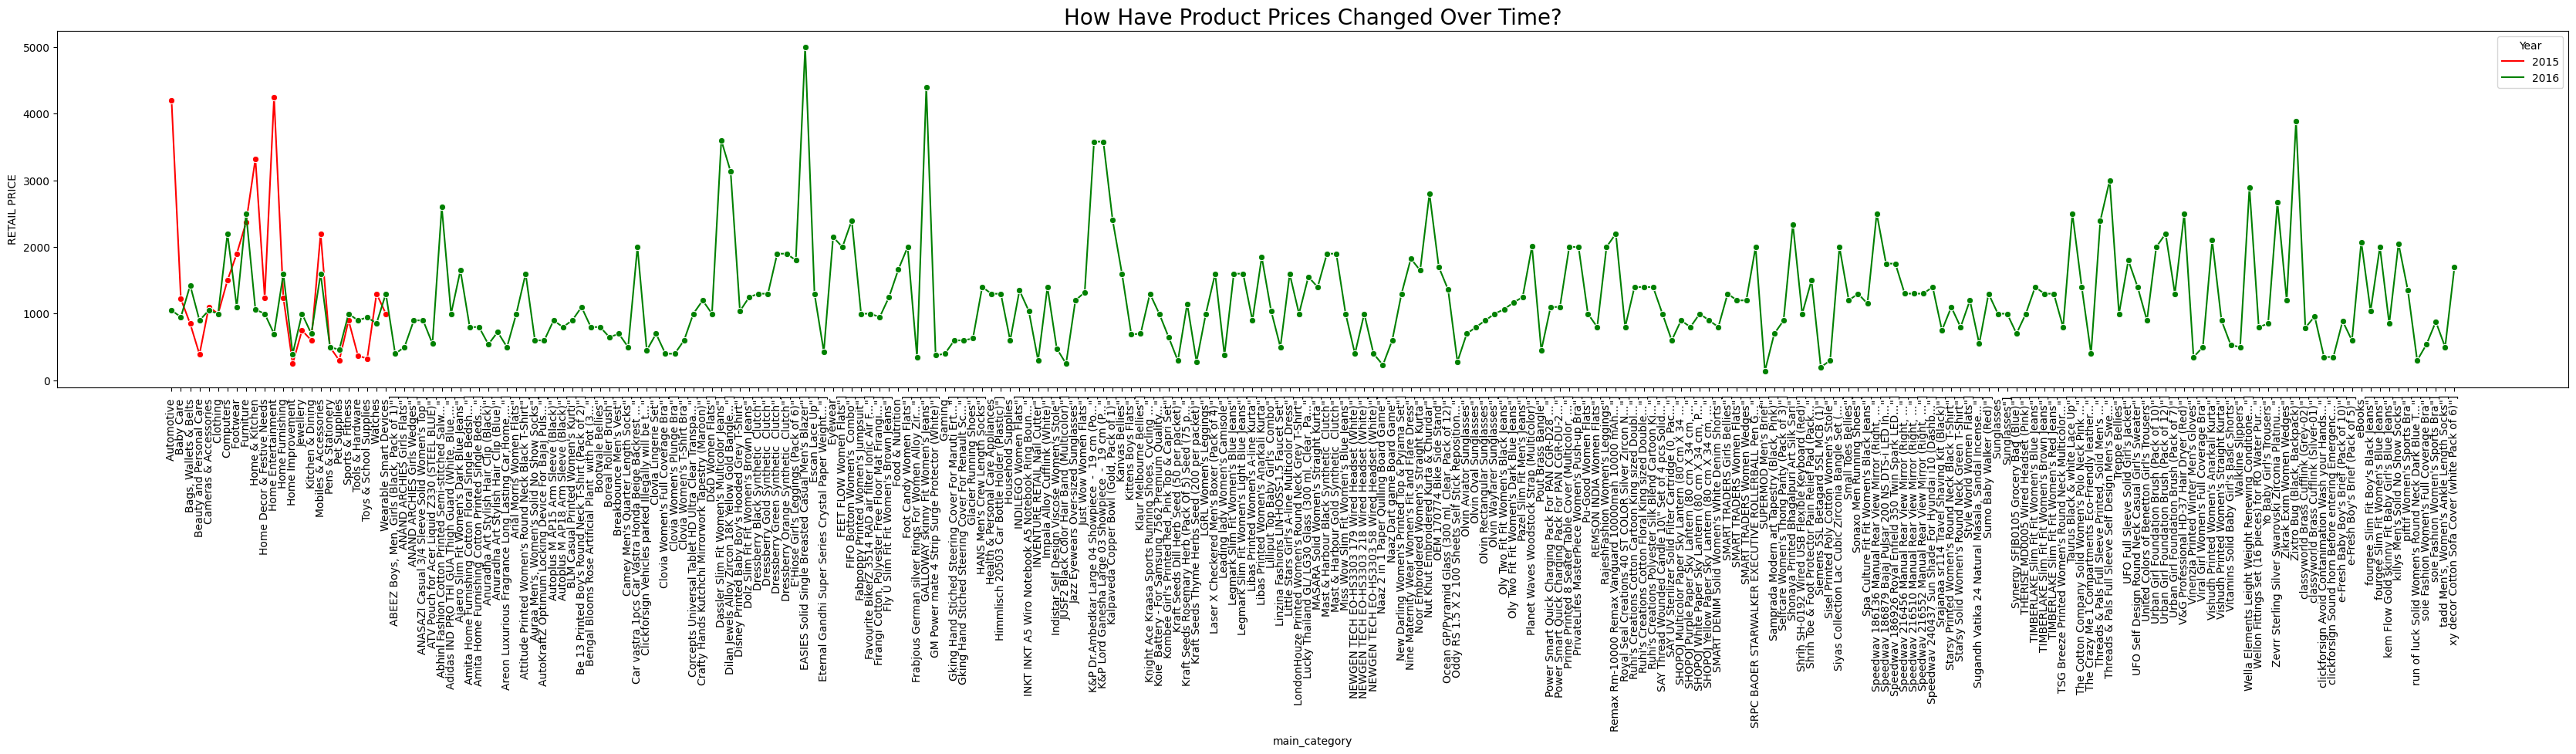

In [265]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
color=['#FF0000','#008000']
plt.ylabel("RETAIL PRICE")
plt.title("How Have Product Prices Changed Over Time?",fontsize=20)
sns.lineplot(y=daily_use_product_price_over_year.values,x=daily_use_product_price_over_year.index.get_level_values('main_category'),
            hue=daily_use_product_price_over_year.index.get_level_values('Year'),palette=color,marker='o')

Above visulization shows that there are lots of new product added in 2016 as compare to 2015 and price is also changed in between these year


In [266]:
# how discount vary over year 
daily_use_product_discount_price_over_year=daily_use_product.groupby(['Year','main_category'])['discounted_price'].median()
daily_use_product_discount_price_over_year


Year  main_category                                        
2015  Automotive                                               1380.0
      Baby Care                                                 640.0
      Bags, Wallets & Belts                                     499.0
      Beauty and Personal Care                                  350.0
      Cameras & Accessories                                     899.0
                                                                ...  
2016  run of luck Solid Women's Round Neck Dark Blue T..."]     299.0
      soie Fashion Women's Full Coverage Bra"]                  486.0
      soie Fashion Women's Sports Bra"]                         792.0
      tadd Men's, Women's Ankle Length Socks"]                  199.0
      xy decor Cotton Sofa Cover (white Pack of 6)"]            599.0
Name: discounted_price, Length: 270, dtype: float64

<Axes: title={'center': 'How Discount Vary Over Year'}, xlabel='main_category', ylabel='DISCOUNT PRICE'>

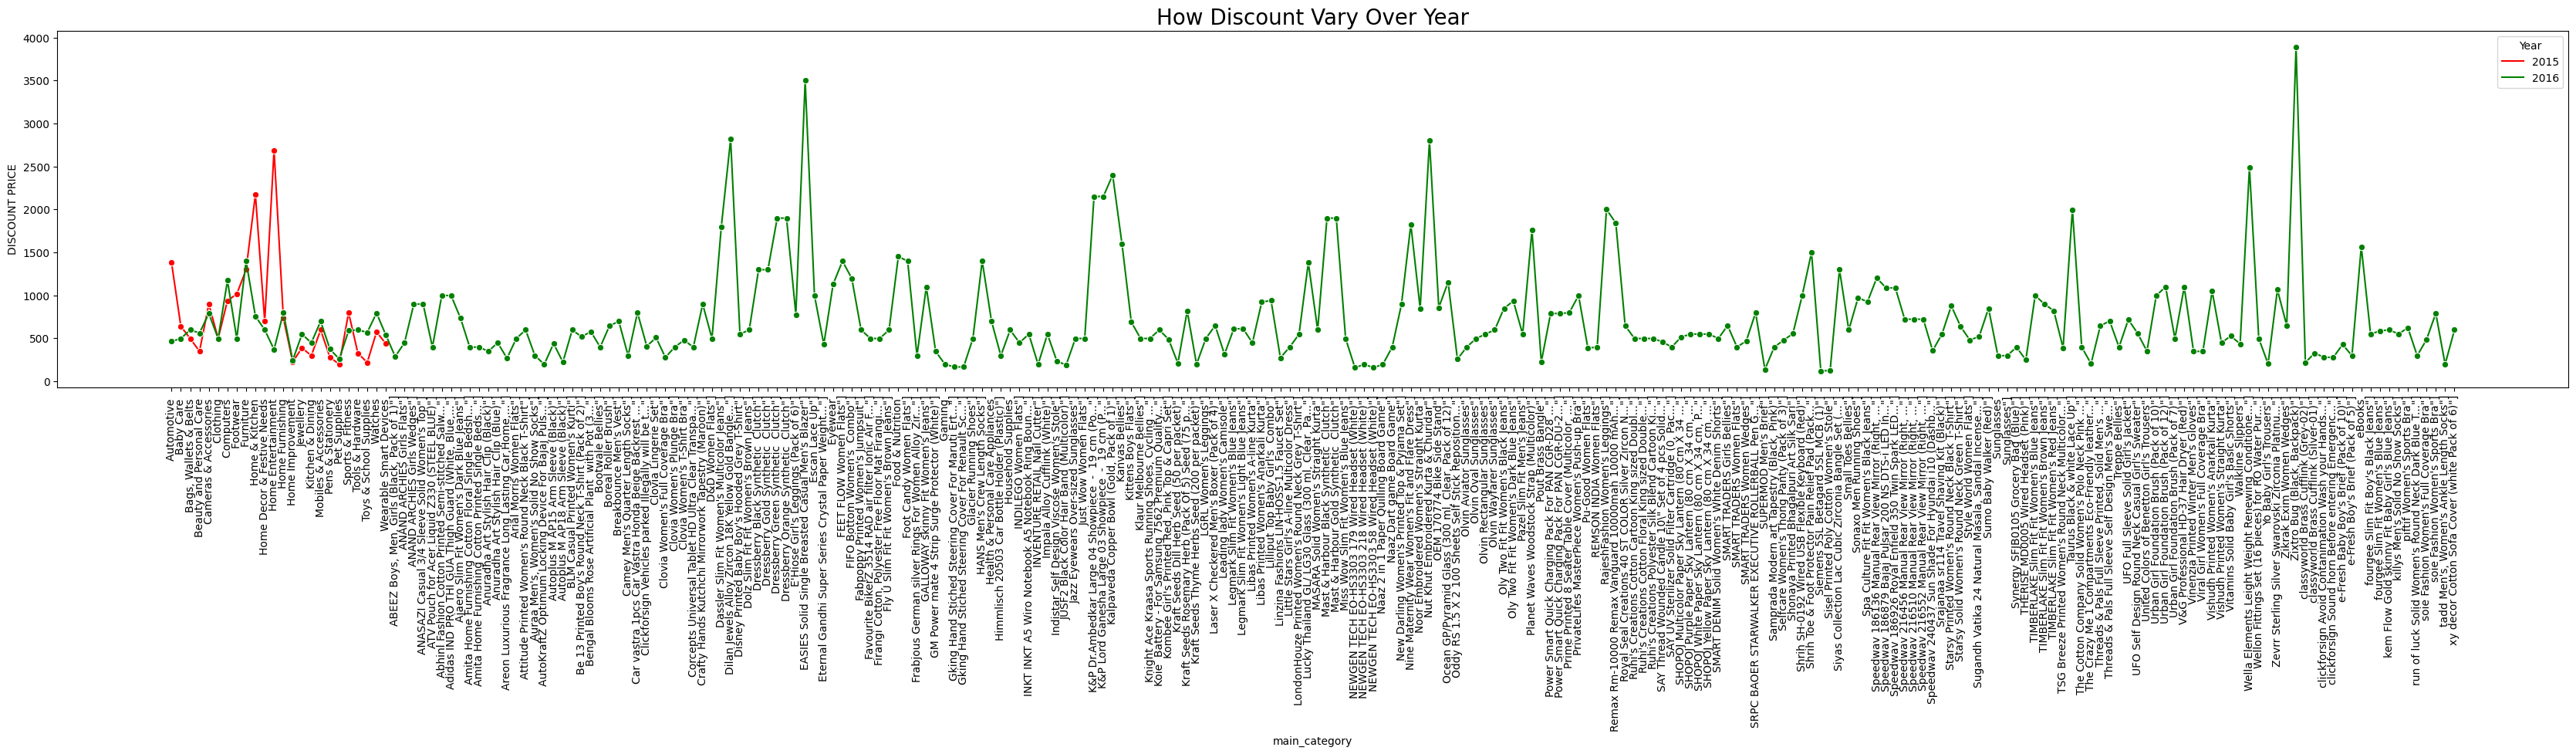

In [267]:

plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
color=['#FF0000','#008000']
plt.ylabel("DISCOUNT PRICE")
plt.title("How Discount Vary Over Year",fontsize=20)
sns.lineplot(y=daily_use_product_discount_price_over_year.values,x=daily_use_product_discount_price_over_year.index.get_level_values('main_category'),
            hue=daily_use_product_discount_price_over_year.index.get_level_values('Year'),palette=color,marker='o')

In [268]:
#How discount_percenatage of main_category vary from year to year,month to month 
#year to year
year_to_year_discount_change_daily_use_product=daily_use_product.groupby(['Year','main_category'])['discount_percentage'].median().sort_values(ascending=False)
year_to_year_discount_change_daily_use_product


Year  main_category                                        
2016  NEWGEN TECH EO-HS3303 218 Wired Headset (White)"]        80.080080
      Himmlisch 20503 Car Bottle Holder (Plastic)"]            76.982294
      Threads & Pals Full Sleeve Self Design Men's Swe..."]    76.584390
      Shonaya Printed Bhagalpuri Art Silk Sari"]               76.282051
      Yo Baby Girl's Trousers"]                                76.000000
                                                                 ...    
      Eternal Gandhi Super Series Crystal Paper Weight..."]     0.000000
      Kittens Boys Flats"]                                      0.000000
      Kanvas Bellies"]                                          0.000000
      Kalpaveda Copper Bowl (Gold, Pack of 1)"]                 0.000000
      SUPERMOD Men's Brief"]                                    0.000000
Name: discount_percentage, Length: 270, dtype: float64

In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
unique_years = year_to_year_discount_change_daily_use_product.index.get_level_values('Year').nunique()
sns.lineplot(y=year_to_year_discount_change_daily_use_product.values,x=year_to_year_discount_change_daily_use_product.index.get_level_values('main_category'),
           hue=year_to_year_discount_change_daily_use_product.index.get_level_values('Year')
             ,palette=sns.color_palette("mako", unique_years))
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title("DISCOUNT PERCENATGE VARY OVER YEARS")

Text(0.5, 1.0, 'DISCOUNT PERCENATGE VARY OVER YEARS')

In [ ]:
month_to_month_discount_change_daily_use_product=daily_use_product.groupby(['Month','main_category'])['discount_percentage'].median().sort_values(ascending=False)
month_to_month_discount_change_daily_use_product


In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
unique_years = month_to_month_discount_change_daily_use_product.index.get_level_values('Month').nunique()
sns.lineplot(y=month_to_month_discount_change_daily_use_product.values,x=month_to_month_discount_change_daily_use_product.index.get_level_values('main_category'),
           hue=month_to_month_discount_change_daily_use_product.index.get_level_values('Month')
             ,palette=sns.color_palette("colorblind", unique_years),marker='o')
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title("Discount Percentage Variation Over Months by Category")

In [ ]:
#let's check if there any seasonal sale and which product has heighest sale in which season
season_sale_daily_use_product=daily_use_product.pivot_table(values='retail_price',index=('Month','main_category'),aggfunc='sum')
season_sale_daily_use_product


In [ ]:
highest_sales_by_month_daily_use_product= season_sale_daily_use_product.groupby('Month').apply(lambda x: x.loc[x['retail_price'].idxmax()])
highest_sales_by_month_daily_use_product.sort_values(by='retail_price',ascending=False)

BY ANALYZE THIS MONTH SALE FACTOR WE FIND THAT MOST SALE OF DAILY USE PRODUCT CATEGORY are purchased in 12,1,3 MONTH AND 12,1 MONTH SALE MAY BE HIGH DUE TO NEW YEAR SALE OFFER OR NEW YEAR CAN BE A FACTOR FOR CUSTOMERS TO PURCHASE PRODUCT.

  Product Popularity:

In [ ]:
#Which product categories have the most products? 
most_products_daily_use_product=daily_use_product.groupby('main_category')['main_category'].size()
top30_daily_use_product=most_products_daily_use_product.nlargest(30)
top30_daily_use_product

In [ ]:
plt.figure(figsize=(80,9))
ax=sns.barplot(x=top30_daily_use_product.index,y=top30_daily_use_product.values)
plt.title("Top 30 product categories and there most products ?",fontsize=20)
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
    

In [ ]:
#product popularity over time 
product_popularity_of_daily_use_product=daily_use_product.groupby(['Year','main_category'])['pid'].count()
product_popularity_of_daily_use_product

In [ ]:
#What are the top 10 most frequently occurring brands?
top_10_brands_of_daily_use_product=daily_use_product.groupby('brand')['brand'].value_counts().nlargest(10)
top_10_brands_of_daily_use_product

In [ ]:
plt.figure(figsize=(20,5))
ax=sns.barplot(y=top_10_brands_of_daily_use_product.values,x=top_10_brands_of_daily_use_product.index.get_level_values('brand'))
plt.xlabel("BRANDS")
plt.title('TOP 10 BRANDS')
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
    

 Category Exploration:
 

In [ ]:
#How many distinct product categories exist in daily use product category? 
main_category_products_of_daily_use_product=daily_use_product.groupby('main_category')['main_category'].nunique()
main_category_products_of_daily_use_product

There are 246 different product category are exist for daily use product tp know this use main_category_products_of_daily_use_product.value_counts()

In [ ]:
#What are the most common product subcategories within each category in daily use product ?
most_common_product_first_category_daily=daily_use_product.groupby(['main_category'])['secondary_category'].nunique().sort_values(ascending=False)
most20_first_category_daily=most_common_product_first_category_daily.head(20)
most20_first_category_daily

In [ ]:
plt.figure(figsize=(50,8))
ax=sns.barplot(y=most20_first_category_daily.values,x=most20_first_category_daily.index.get_level_values('main_category')
              ,width=0.90,palette='mako')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

In [ ]:
most_common_product_second_category_daily=daily_use_product.groupby(['secondary_category'])['tertiary_category'].nunique().sort_values(ascending=False)
most20_second_category_daily=most_common_product_second_category_daily.head(20)
most20_second_category_daily

In [ ]:
plt.figure(figsize=(40,8))
ax=sns.barplot(y=most20_second_category_daily.values,x=most20_second_category_daily.index.get_level_values('secondary_category')
               ,width=0.90)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

In [ ]:
most_common_product_third_category_daily=daily_use_product.groupby(['tertiary_category'])['quaternary_category'].nunique().sort_values(ascending=False)
most20_third_category_daily=most_common_product_third_category_daily.nlargest(20)
most20_third_category_daily

In [ ]:
plt.figure(figsize=(40,8))
ax=sns.barplot(y=most20_third_category_daily.values,x=most20_third_category_daily.index.get_level_values('tertiary_category')
               ,width=0.90,palette='rocket')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

In [ ]:
# What are the most common product subcategories within each category?
level_1_category_daily_use_product=daily_use_product.groupby(['main_category','secondary_category']).size().sort_values(ascending=False)
level_1_category_daily_use_product

In [ ]:
level_2_category_daily_use_product=daily_use_product.groupby(['secondary_category','tertiary_category']).size().sort_values(ascending=False)
level_2_category_daily_use_product

In [ ]:
level_3_category_daily_use_product=daily_use_product.groupby(['tertiary_category','quaternary_category']).size().sort_values(ascending=False)
level_3_category_daily_use_product

Conclusion: From above analysis we find that there is most sales in "Clothing" category in which subcategory "women's clothing" is on top followed by 'men's clothing' if we futher go deep down we will find that "western wear" are on peek and in 'western wear' "Shirts, Tops & Tunics" are mostly odered followed by 'Dresses & skirts'. Second most purchased thing is 'Jewellery' and in jewellery ' Necklaces & Chains ' are mostly ordered and in this category (Necklaces & Chains) mostly necklaces are placed.

  Brand Analysis:
  

In [ ]:
#Which brands have the most products in the daily use product category? 
most_brands_daily_use_product=daily_use_product.groupby('brand').size()
top50_brands_daily_use_product= most_brands_daily_use_product.nlargest(50)
top50_brands_daily_use_product

In [ ]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
sns.barplot(x=top50_brands_daily_use_product.index,y=top50_brands_daily_use_product.values)
plt.xlabel('BRANDS')
plt.ylabel('NUMBER OF PRODUCTS')
plt.title("TOP 50 BRANDS")

In [ ]:
most_brands_daily_use_product.nsmallest(50)

In [ ]:
#Are there any brands that consistently offer higher discounts?
#Finding which brands give what percentage of discount to their product
higher_discount_brands_daily_use_product=daily_use_product.groupby('brand')['discount_percentage'].mean()
top30_discount_brands_daily_use_product= higher_discount_brands_daily_use_product.nlargest(30)
top30_discount_brands_daily_use_product

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=top30_discount_brands_daily_use_product.index,y=top30_discount_brands_daily_use_product.values)
plt.title('TOP 30 BRANDS WITH THEIR DISCOUNT PERCENTAGE',loc='center')
for x in ax.containers:
    ax.bar_label(x,fmt='%d')

In [ ]:
#To check the brands consistency for discount_percentage we can find standard devation to know more.
consistent_higher_discount_brands_daily=daily_use_product.groupby('brand')['discount_percentage'].std()

top30_consistent_higher_discount_brands_daily= consistent_higher_discount_brands_daily.sort_values(ascending=False).head(30)
top30_consistent_higher_discount_brands_daily

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=top30_consistent_higher_discount_brands_daily.index,y=top30_consistent_higher_discount_brands_daily.values)
plt.title('TOP 30 BRANDS WITH CONSISTENT DISCOUNT',loc='center')
plt.xlabel('BRANDS')
for x in ax.containers:
    ax.bar_label(x,fmt='%d')

CONCLUSION: As from above visualiazation about brands and their disount percentage we find that 
Bling              94.548458
Instella           91.719745
Bond Beatz         91.596639
Mydress Mystyle    90.518987
CUBA               90.045023 
these are the top 5 brands with their discount percentage which give heighest discount on their product. But if we talk about consistent brands which give heigher discount are different compare to brands with heigher discount and these are:
American Swan            42.444861
Nike                     42.426407
Platinum                 37.737520
IWS                      35.414363
raju purse collection    35.390730  
so,finally we find that American Swan give consistent heigher discounts on their products.

                                                       OCCASIONAL PRODUCT 
                                                            ANALYSIS

In [ ]:
occasional_product.sample(10)

PRICE ANALYSIS:

In [ ]:
occasional_product.describe()

In [ ]:
#How average and median price vary for different products category
average_retail_price_for_occasional_products=occasional_product.groupby(['main_category'])['retail_price'].apply(lambda x: x.mean())
median_retail_price_for_occasional_products=occasional_product.groupby(['main_category'])['retail_price'].apply(lambda x: x.median())

average_retail_price_for_occasional_products

In [ ]:
plt.figure(figsize=(42,5))
plt.xticks(rotation=90)

sns.barplot(y=average_retail_price_for_occasional_products.values,x=average_retail_price_for_occasional_products.index,color='blue',label='MEAN OF RETAIL_PRICE')
sns.barplot(y=median_retail_price_for_occasional_products.values,x=median_retail_price_for_occasional_products.index,color='red',label="MEDIAN OF RETAIL_PRICE")
plt.xlabel("MAIN CATEGORY")
plt.legend(loc="upper right")

In [ ]:
# how discount vary by different main category in  occasional product category
average_discounted_price_for_occasional_product=occasional_product.groupby(['main_category'])['discounted_price'].apply(lambda x: x.mean())
median_discounted_price_for_occasional_product=occasional_product.groupby(['main_category'])['discounted_price'].apply(lambda x: x.median())


In [ ]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(42,5))
plt.xticks(rotation=90)
sns.lineplot(y=average_discounted_price_for_occasional_product.values,x=average_discounted_price_for_occasional_product.index,color='blue',label='MEAN OF RETAIL_PRICE')
sns.lineplot(y=median_discounted_price_for_occasional_product.values,x=median_discounted_price_for_occasional_product.index,color='red',label="MEDIAN OF RETAIL_PRICE")
plt.xlabel("MAIN CATEGORY")
plt.legend(loc="upper right")

In [ ]:
# how discount percenatge vary for diferent product in occasional product
plt.figure(figsize=(20,5))
sns.histplot(occasional_product['discount_percentage'],kde=True)
plt.title('DISCOUNT PERCENTAGE DISTRIBUTION FOR OCCASIONAL PRODUCTS')
plt.xlabel("DISCOUNT PERCENTAGE")
plt.ylabel(" COUNT OF DISCOUNT PERCENATGE % ")


In [ ]:
# top 30 products with average heighest discount in occasional products 
discount=occasional_product.groupby(['main_category'])['discount_percentage'].mean()
top_30_discounted_occasional_product=discount.nlargest(30)
top_30_discounted_occasional_product

In [ ]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=top_30_discounted_occasional_product.index,y=top_30_discounted_occasional_product.values,palette='colorblind')
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title('TOP 30 DISCOUNTED PRODUCTS IN DAILY USE PRODUCTS CATEGORY')
for conatiner in ax.containers:
    ax.bar_label(conatiner,fmt='%d')

In [ ]:
#Are there any significant price differences between FK Advantage products and others?
fk_advantage_product_in_occasional_products=occasional_product.groupby(["is_FK_Advantage_product"])['retail_price'].describe()
fk_advantage_product_in_occasional_products

In [ ]:
#Are there any significant price differences between FK Advantage products and others?
discounted_fk_advantage_product_in_occasional_products=occasional_product.groupby(["is_FK_Advantage_product"])['discounted_price'].describe()
discounted_fk_advantage_product_in_occasional_products

From above analysis we find that there are few product which are fk_advantage products in occasional category as compare to daily use product catgeory and not same discount sceam is exist for occasional product category


In [ ]:
#correlection between retail_price,discounted_price,discount_percetage
corr_occasional_products=occasional_product[['retail_price','discounted_price','discount_percentage']].corr()
corr_occasional_products

In [ ]:
sns.heatmap(corr_occasional_products,vmin=-1,vmax=1,annot=True)

RATING ANALYSIS:


In [ ]:
#how rating are related to each other in occasional product category
rating_corr_occa=occasional_product[['product_rating','overall_rating']].corr()
rating_corr_occa

In [ ]:
sns.heatmap(rating_corr,vmin=-1,vmax=1,cmap='coolwarm',annot=True)

In [ ]:
#how rating vary for diferent products of occasional product category after removing zero rating for better results
errorfree_rating_occasional_product=occasional_product[~((occasional_product['product_rating']==0) & (occasional_product['overall_rating']==0))]
errorfree_rating_occasional_product
plt.figure(figsize=(20,5))
sns.histplot(errorfree_rating_occasional_product.product_rating,kde=True)
plt.xlabel("PRODUCT RATING")
plt.ylabel("NUMBER OF RATING ")
plt.title("PRODUCT RATING OF OCCASIONAL PRODUCTS")

In [ ]:
plt.figure(figsize=(18,5))
sns.histplot(errorfree_rating_occasional_product.overall_rating,kde=True)
plt.xlabel("OVERALL RATING")
plt.ylabel("NUMBER OF RATING ")
plt.title("OVERALL RATING OF OCCASIONAL PRODUCTS")

In [ ]:
#how retail_price,product_rating,overall_rating related to each other 
rating_corr_occasional_products=errorfree_rating_occasional_product[['retail_price','product_rating','overall_rating']].corr()
rating_corr_occasional_products

In [ ]:
sns.heatmap(rating_corr_occasional_products,vmin=-1,vmax=1,annot=True)

In [ ]:
#How have product prices changed over time in occasional product catgeory?
occasional_product_price_over_year=occasional_product.groupby(['Year','main_category'])['retail_price'].median()
occasional_product_price_over_year

In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
color=['#FF0000','#008000']
plt.ylabel("RETAIL PRICE")
plt.title("How Have Product Prices Changed Over Time?",fontsize=20)
sns.lineplot(y=occasional_product_price_over_year.values,x=occasional_product_price_over_year.index.get_level_values('main_category'),
            hue=occasional_product_price_over_year.index.get_level_values('Year'),palette=color,marker='o')

From above visulaization we find that price of baby care,bags,wallets& belts,camera&accessories increased in 2016 as compare to 2015 in clothing and computers section price is fall down as well as for home improvement also furniture price is fall in 2016 and rest items price increased and also too many new items are added in 2016.

In [ ]:
# how discount vary over year 
occasional_product_discount_price_over_year=occasional_product.groupby(['Year','main_category'])['discounted_price'].median()
occasional_product_discount_price_over_year


In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
color=['#FF0000','#008000']
plt.ylabel("DISCOUNT PRICE")
plt.title("How Discount Vary Over Year",fontsize=20)
sns.lineplot(y=occasional_product_discount_price_over_year
.values,x=occasional_product_discount_price_over_year
.index.get_level_values('main_category'),
            hue=occasional_product_discount_price_over_year
.index.get_level_values('Year'),palette=color,marker='o')

In [ ]:
#How discount_percenatage of main_category vary from year to year,month to month 
#year to year
year_to_year_discount_change_of_occasional =occasional_product.groupby(['Year','main_category'])['discount_percentage'].median().sort_values(ascending=False)
year_to_year_discount_change_of_occasional


In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
unique_years = year_to_year_discount_change_of_occasional.index.get_level_values('Year').nunique()
sns.lineplot(y=year_to_year_discount_change_of_occasional
.values,x=year_to_year_discount_change_of_occasional.index.get_level_values('main_category'),
           hue=year_to_year_discount_change_of_occasional.index.get_level_values('Year')
             ,palette=sns.color_palette("mako", unique_years))
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title("DISCOUNT PERCENATGE VARY OVER YEARS")

In [ ]:
month_to_month_discount_change_occasional=occasional_product.groupby(['Month','main_category'])['discount_percentage'].median().sort_values(ascending=False)
month_to_month_discount_change_occasional


In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
unique_years = month_to_month_discount_change_occasional.index.get_level_values('Month').nunique()
sns.lineplot(y=month_to_month_discount_change_occasional.values,x=month_to_month_discount_change_occasional.index.get_level_values('main_category'),
           hue=month_to_month_discount_change_occasional.index.get_level_values('Month')
             ,palette=sns.color_palette("colorblind", unique_years),marker='o')
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title("Discount Percentage Variation Over Months by Category")

In [ ]:
#let's check if there any seasonal sale and which product has heighest sale in which season
season_sale_of_occasional=occasional_product.pivot_table(values='retail_price',index=('Month','main_category'),aggfunc='sum')
season_sale_of_occasional


In [ ]:
highest_sales_by_month_of_occasional = season_sale_of_occasional.groupby('Month').apply(lambda x: x.loc[x['retail_price'].idxmax()])
highest_sales_by_month_of_occasional.sort_values(by='retail_price',ascending=False)

In occasional product category most products are odered in 1,12 and in 3 months.

Product Popularity:


In [ ]:
#Which product categories have the most products in occasional product category? 
most_products_occasional=occasional_product.groupby('main_category')['main_category'].size()
most_products_occasional.sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(80,9))
plt.xticks(rotation=90)
ax=sns.barplot(y=most_products_occasional.values,x=most_products_occasional.index)
plt.title("Product Categories And There Most Products In Occasional Category ?",fontsize=20)
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
    

Occasionaly Jewellary,home decor,clothing,computers,furniture are mainly buy

In [ ]:
#product popularity over time 
product_popularity_occasional=occasional_product.groupby(['Year','main_category'])['pid'].count()
product_popularity_occasional

In [ ]:
#What are the top 10 most frequently occurring brands in occasional product category?
top_10_brands_occasional=occasional_product.groupby('brand')['brand'].value_counts().nlargest(10)
top_10_brands_occasional

In [ ]:
plt.figure(figsize=(20,5))
ax=sns.barplot(y=top_10_brands_occasional.values,x=top_10_brands_occasional.index.get_level_values('brand'))
plt.xlabel("BRANDS")
plt.title('TOP 10 BRANDS')
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
    

Category Exploration:


In [ ]:
#How many distinct product categories exist? 
main_category_occasional_products=occasional_product.groupby('main_category')['main_category'].nunique()
main_category_occasional_products

main_category_occasional_products.value_counts() is  use to know the count of  different category in occsional product category
There are total 46 different categories exist in this category

In [ ]:
#What are the most common product subcategories within each category of occasional product?
occasional_most_common_product_first_category=occasional_product.groupby(['main_category'])['secondary_category'].nunique().sort_values(ascending=False)
occasional_most20_first_category=occasional_most_common_product_first_category.head(20)
occasional_most20_first_category

In [ ]:
plt.figure(figsize=(50,8))
ax=sns.barplot(y=occasional_most20_first_category.values,x=occasional_most20_first_category.index.get_level_values('main_category')
              ,width=0.90)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

In [ ]:
occasional_most_common_product_second_category=occasional_product.groupby(['secondary_category'])['tertiary_category'].nunique().sort_values(ascending=False)
occasional_most20_second_category=occasional_most_common_product_second_category.head(20)
occasional_most20_second_category

In [ ]:
plt.figure(figsize=(40,8))
ax=sns.barplot(y=occasional_most20_second_category.values,x=occasional_most20_second_category.index.get_level_values('secondary_category')
               ,width=0.90)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

In [ ]:
occasional_most_common_product_third_category=occasional_product.groupby(['tertiary_category'])['quaternary_category'].nunique().sort_values(ascending=False)
occasional_most20_third_category=occasional_most_common_product_third_category.nlargest(20)
occasional_most20_third_category

In [ ]:
plt.figure(figsize=(40,8))
ax=sns.barplot(y=occasional_most20_third_category.values,x=occasional_most20_third_category.index.get_level_values('tertiary_category')
               ,width=0.90)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

In [ ]:
# What are the most common product subcategories within each category?
level_1_category_occasional=occasional_product.groupby(['main_category','secondary_category']).size().sort_values(ascending=False)
level_1_category_occasional

In [ ]:
level_2_category_occasional=occasional_product.groupby(['secondary_category','tertiary_category']).size().sort_values(ascending=False)
level_2_category_occasional

In [ ]:
level_3_category_occasional=occasional_product.groupby(['tertiary_category','quaternary_category']).size().sort_values(ascending=False)
level_3_category_occasional

Conclusion: From above analysis we find that there is most sales in "Jewellary" category in which subcategory "rings" is on top.Second most purchased thing is 'computer' and in computer 'Network Component ' are mostly ordered and in this category (Network Compomemt) mostly Routers are placed.

Brand Analysis:


In [ ]:
#Which brands have the most products in the occasional product category? 
most_brands_occasional=occasional_product.groupby('brand').size()
top50_most_brands_occasional=most_brands_occasional.sort_values(ascending=False).head(50)
top50_most_brands_occasional

In [ ]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=top50_most_brands_occasional.index,y=top50_most_brands_occasional.values)
plt.xlabel('BRANDS')
plt.ylabel('NUMBER OF PRODUCTS')
plt.title("TOP 50 BRANDS")
for x in ax.containers:
    ax.bar_label(x,fmt='%d')

In [ ]:
most_brands_occasional.nsmallest(50)

In [ ]:
#Are there any brands that consistently offer higher discounts?
#Finding which brands give what percentage of discount to their product in occasional product category
occasional_higher_discount_brands=occasional_product.groupby('brand')['discount_percentage'].mean()
top30occasional_higher_discount_brands=occasional_higher_discount_brands.nlargest(30)
top30occasional_higher_discount_brands

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=top30occasional_higher_discount_brands.index,y=top30occasional_higher_discount_brands.values)
plt.title('TOP 30 BRANDS WITH THEIR DISCOUNT PERCENTAGE',loc='center')

In [ ]:
#To check the brands consistency for discount_percentage we can find standard devation to know more.
occasional_consistent_higher_discount_brands=occasional_product.groupby('brand')['discount_percentage'].std()
top30_occasional_consistent_higher_discount_brands=occasional_consistent_higher_discount_brands.sort_values(ascending=False).head(30)
top30_occasional_consistent_higher_discount_brands

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=top30_occasional_consistent_higher_discount_brands.index,y=top30_occasional_consistent_higher_discount_brands.values)
plt.title('TOP 30 BRANDS WITH CONSISTENT DISCOUNT',loc='center')
plt.xlabel('BRANDS')

                                                        LUXURY PRODUCTS
                                                           ANALYSIS:

In [ ]:
luxury_product.sample(10)

Price analysis of luxury products:

In [ ]:
luxury_product.describe()

In [ ]:
#What are the average retail and discounted prices of products?
average_retail_price=luxury_product.groupby('main_category')['retail_price'].mean()
average_retail_price

In [ ]:
sns.barplot(y=average_retail_price.index,x=average_retail_price.values,palette='rocket')
plt.title("Average Retail Price Of Different Luxury Product")
plt.xlabel("Average Retail Price")
plt.ylabel('Main Category')

In [ ]:
# DISCOUNTES PRICE 
average_discounted_price=luxury_product.groupby('main_category')['discounted_price'].mean()
average_discounted_price

In [ ]:
sns.barplot(y=average_discounted_price.index,x=average_discounted_price.values,palette='rocket')
plt.title("Average Discounted Price Of Different Luxury Product")
plt.xlabel("Average Discount Price")
plt.ylabel('Main Category')

In [ ]:
#How do prices vary across different product categories?
mean_category_price_luxury=luxury_product.groupby('main_category')['retail_price'].mean()
median_category_price_luxury=luxury_product.groupby('main_category')['retail_price'].median()
mean_category_price_luxury
median_category_price_luxury

In [ ]:
plt.figure(figsize=(7,3))
plt.xticks(rotation=90)
sns.lineplot(x=mean_category_price_luxury.index,y=mean_category_price_luxury,color='red',label="mean_of_luxury_price")
sns.lineplot(x=median_category_price_luxury.index,y=median_category_price_luxury,color='green',label="medain_of_luxury_price")
plt.xlabel("MAIN CATEGORY")
plt.ylabel("RETAIL PRICE")
plt.legend(loc='upper left')
plt.title("Prices Vary Across Different Product Categories")


In [ ]:
#What is the distribution of price discounts percentage offered?

sns.histplot(luxury_product['discount_percentage'],kde=True)
plt.ylabel("Number Of Product")
plt.title("DISTRIBUTION OF DISCOUNT PERCENTAGE")

In [ ]:
#All products which have more than 30% discounts
discount30=luxury_product[(luxury_product['discount_percentage']>30)]
discount30

In [ ]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x=discount30.main_category,y=discount30.discount_percentage)
plt.title('Discount Percentage')
for x in ax.containers:
    ax.bar_label(x,fmt='%d')


In [ ]:
#Are there any significant price differences between FK Advantage products and others?
luxury_product['is_FK_Advantage_product'].value_counts()

In [ ]:
luxury_product.groupby('is_FK_Advantage_product')['retail_price'].describe()


THERE IS NO PRODUCT WITH FK_ADVANTAGE 

In [ ]:
#correlection between retail_price,discounted_price,discount_percetage
corr_luxury_products=luxury_product[['retail_price','discounted_price','discount_percentage']].corr()
corr_luxury_products


In [ ]:
sns.heatmap(corr_luxury_products,vmin=-1,vmax=1,annot=True)

RATING ANALYSIS:


In [ ]:
rating_corr_luxury=luxury_product[['product_rating','overall_rating']].corr()
rating_corr_luxury

In [ ]:
#how rating vary for diferent products of occasional product category after removing zero rating for better results
errorfree_rating_luxury_product=luxury_product[~((luxury_product['product_rating']==0) & (luxury_product['overall_rating']==0))]
errorfree_rating_luxury_product
plt.figure(figsize=(20,5))
sns.histplot(errorfree_rating_luxury_product.product_rating,kde=True)
plt.xlabel("PRODUCT RATING")
plt.ylabel("NUMBER OF RATING ")
plt.title("PRODUCT RATING OF LUXURY PRODUCTS")


In [ ]:
plt.figure(figsize=(18,5))
sns.histplot(errorfree_rating_luxury_product.overall_rating,kde=True)
plt.xlabel("OVERALL RATING")
plt.ylabel("NUMBER OF RATING ")
plt.title("OVERALL RATING OF LUXURY PRODUCTS")

In [ ]:
errorfree_rating_luxury_product

only one product which have rating in luxury product category 

In [ ]:
#how retail_price,product_rating,overall_rating related to each other 
rating_corr_luxury_products=luxury_product[['retail_price','product_rating','overall_rating']].corr()
rating_corr_luxury_products

In [ ]:
sns.heatmap(rating_corr_luxury_products,vmin=-1,vmax=1,annot=True)

In [ ]:
#How have product prices changed over time in luxury product catgeory?
luxury_product_price_over_year=luxury_product.groupby(['Year','main_category'])['retail_price'].median()
luxury_product_price_over_year

In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
color=['#FF0000','#008000']
plt.ylabel("RETAIL PRICE")
plt.title("How Have Product Prices Changed Over Time?",fontsize=20)
sns.lineplot(y=luxury_product_price_over_year.values,x=luxury_product_price_over_year.index.get_level_values('main_category'),
            hue=luxury_product_price_over_year.index.get_level_values('Year'),palette=color,marker='o')

In [ ]:
# how discount vary over year 
luxury_product_discount_price_over_year=luxury_product.groupby(['Year','main_category'])['discounted_price'].median()
luxury_product_discount_price_over_year


In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
color=['#FF0000','#008000']
plt.ylabel("DISCOUNT PRICE")
plt.title("How Discount Vary Over Year",fontsize=20)
sns.lineplot(y=luxury_product_discount_price_over_year
.values,x=luxury_product_discount_price_over_year
.index.get_level_values('main_category'),
            hue=luxury_product_discount_price_over_year
.index.get_level_values('Year'),palette=color,marker='o')

In [ ]:
#How discount_percenatage of main_category vary from year to year,month to month 
#year to year
year_to_year_discount_change_of_luxury =luxury_product.groupby(['Year','main_category'])['discount_percentage'].median().sort_values(ascending=False)
year_to_year_discount_change_of_luxury


In [ ]:
plt.figure(figsize=(30,6))
plt.xticks(rotation=90)
unique_years = year_to_year_discount_change_of_luxury.index.get_level_values('Year').nunique()
sns.lineplot(y=year_to_year_discount_change_of_luxury
.values,x=year_to_year_discount_change_of_luxury.index.get_level_values('main_category'),
           hue=year_to_year_discount_change_of_luxury.index.get_level_values('Year')
             ,palette=sns.color_palette("mako", unique_years))
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title("DISCOUNT PERCENATGE VARY OVER YEARS")

In [ ]:
month_to_month_discount_change_luxury=luxury_product.groupby(['Month','main_category'])['discount_percentage'].median().sort_values(ascending=False)
month_to_month_discount_change_luxury


In [ ]:
plt.figure(figsize=(42,6))
plt.xticks(rotation=90)
unique_years = month_to_month_discount_change_luxury.index.get_level_values('Month').nunique()
sns.lineplot(y=month_to_month_discount_change_luxury.values,x=month_to_month_discount_change_luxury.index.get_level_values('main_category'),
           hue=month_to_month_discount_change_luxury.index.get_level_values('Month')
             ,palette=sns.color_palette("colorblind", unique_years),marker='o')
plt.xlabel("MAIN CATEGORY")
plt.ylabel("DISCOUNT PERCENTAGE %")
plt.title("Discount Percentage Variation Over Months by Category")

In [ ]:
#let's check if there any seasonal sale and which product has heighest sale in which season
season_sale_of_luxury=luxury_product.pivot_table(values='retail_price',index=('Month','main_category'),aggfunc='sum')
season_sale_of_luxury


In [ ]:
highest_sales_by_month_of_luxury = season_sale_of_luxury.groupby('Month').apply(lambda x: x.loc[x['retail_price'].idxmax()])
highest_sales_by_month_of_luxury.sort_values(by='retail_price',ascending=False)

In luxury product category mostly sales are in 12,3,1 months of year.May be it is because of new year,diwali and more festival celebration

Product Popularity:


In [ ]:
#Which product categories have the most products in luxury product category? 
most_products_luxury=luxury_product.groupby('main_category')['main_category'].size()
most_products_luxury.sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
ax=sns.barplot(y=most_products_luxury.values,x=most_products_luxury.index)
plt.title("Product Categories And There Most Products In Luxury Category ?",fontsize=20)
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
    

In [ ]:
#product popularity over time 
product_popularity_luxury=luxury_product.groupby(['Year','main_category'])['pid'].count()
product_popularity_luxury

In [ ]:
#What are the top 10 most frequently occurring brands in luxury product category?
brands_luxury=luxury_product.groupby('brand')['brand'].value_counts()
brands_luxury

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y=brands_luxury.values,x=brands_luxury.index.get_level_values('brand'))
plt.xlabel("BRANDS")
plt.title('TOP BRANDS')
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
    

In [ ]:
#How many distinct product categories exist in luxury segment
main_category_luxury_products=luxury_product.groupby('main_category')['main_category'].nunique()
main_category_luxury_products 


In [ ]:
#What are the most common product subcategories within each category of luxury product?
luxury_most_common_product_first_category=luxury_product.groupby(['main_category'])['secondary_category'].nunique().sort_values(ascending=False)
luxury_most_common_product_first_category


In [ ]:
luxury_most_common_product_second_category=luxury_product.groupby(['secondary_category'])['tertiary_category'].nunique().sort_values(ascending=False)
luxury_most_common_product_second_category


In [ ]:
luxury_most_common_product_third_category=luxury_product.groupby(['tertiary_category'])['quaternary_category'].nunique().sort_values(ascending=False)
luxury_most_common_product_third_category


In [ ]:
# What are the most common product subcategories within each category?
level_1_category_luxury=luxury_product.groupby(['main_category','secondary_category']).size().sort_values(ascending=False)
level_1_category_luxury

In [ ]:
level_2_category_luxury=luxury_product.groupby(['secondary_category','tertiary_category']).size().sort_values(ascending=False)
level_2_category_luxury

In [ ]:
level_3_category_luxury=luxury_product.groupby(['tertiary_category','quaternary_category']).size().sort_values(ascending=False)
level_3_category_luxury

In [ ]:
#Which brands have the most products in the luxury product category? 
most_brands_luxury=luxury_product.groupby('brand').size()
most_brands_luxury.sort_values(ascending=False)


In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=most_brands_luxury.index,y=most_brands_luxury.values)
plt.xlabel('BRANDS')
plt.ylabel('NUMBER OF PRODUCTS')
plt.title("TOP 50 BRANDS")
for x in ax.containers:
    ax.bar_label(x,fmt='%d')

In [ ]:
#Are there any brands that consistently offer higher discounts?
#Finding which brands give what percentage of discount to their product in luxury product category
luxury_higher_discount_brands=luxury_product.groupby('brand')['discount_percentage'].mean()
luxury_higher_discount_brands

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=luxury_higher_discount_brands.index,y=luxury_higher_discount_brands.values,palette='mako')
plt.title('BRANDS WITH THEIR DISCOUNT PERCENTAGE',loc='center')

In [ ]:
#To check the brands consistency for discount_percentage we can find standard devation to know more.
luxury_consistent_higher_discount_brands=luxury_product.groupby('brand')['discount_percentage'].std()
luxury_consistent_higher_discount_brands.sort_values(ascending=False)